In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

# neg_mean_squared_error
# neg_mean_absolute_percentage_error
# neg_mean_absolute_error
# neg_root_mean_squared_error

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install
 # ВОТ ЭТО НУЖНО УСТАНОВИТЬ ЧТОБЫ ПОЛЬЗОВАТЬСЯ COMPARE_MODELS
# !pip install autoviz
# !pip install --pre pycaret

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from IPython.display import Image

import category_encoders as ce
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.feature_selection  import RFE
from sklearn.decomposition import PCA

### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВАЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv'# содержит только имя файла, без имен папок !!!

In [5]:
df = pd.read_csv(path_train)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145179 entries, 0 to 145178
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    145179 non-null  float64
 1   cut      145179 non-null  object 
 2   color    145179 non-null  object 
 3   clarity  145179 non-null  object 
 4   depth    145179 non-null  float64
 5   table    145179 non-null  float64
 6   x        145179 non-null  float64
 7   y        145179 non-null  float64
 8   z        145179 non-null  float64
 9   price    145179 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 11.1+ MB


In [7]:
df.describe()

,carat,depth,table,x,y,z,price
count,145179.000000,145179.000000,145179.000000,145179.000000,145179.000000,145179.000000,145179.000000
mean,0.791300,61.820854,57.229656,5.716450,5.721229,3.535055,3972.751996
std,0.463331,1.082079,1.920026,1.110629,1.103516,0.690620,4036.300085
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,948.000000
50%,0.700000,61.900000,57.000000,5.710000,5.720000,3.530000,2409.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,70.000000,9.650000,10.010000,31.300000,18818.000000


In [8]:
# отбор всех сторок с нулевым. значением в любом месте колонки
df[df.eq(0).any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
28099,2.17,Premium,H,SI2,60.3,57.0,8.42,8.36,0.0,15923
44199,0.71,Very Good,F,SI2,62.0,60.0,0.00,6.71,0.0,2130
81538,2.20,Premium,I,SI2,60.1,60.0,8.45,8.41,0.0,11221
95099,0.71,Good,F,SI1,64.1,60.0,0.00,0.00,0.0,2130
110571,2.18,Premium,H,SI2,59.4,60.0,8.46,8.41,0.0,15842
127686,2.18,Premium,H,SI2,60.8,59.0,8.42,8.38,0.0,13938


In [9]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

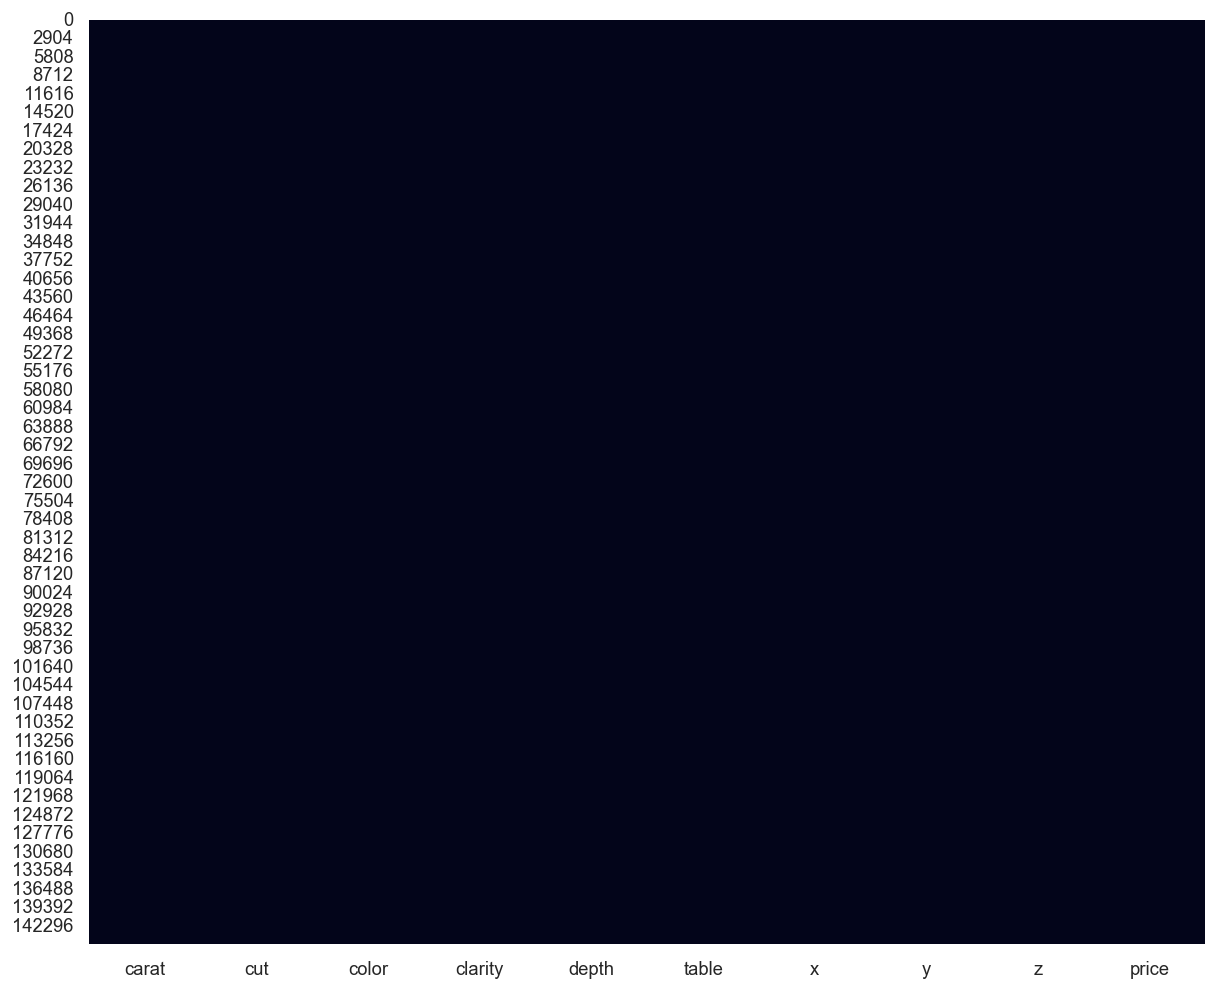

In [10]:
sns.set(rc={'figure.dpi': 120, 'figure.figsize': (12, 10)})
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [11]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Уникальные элементы колонки {col}: {unique_vals}")

Уникальные элементы колонки carat: [1.01 1.08 2.02 0.32 0.74 0.44 1.09 0.7  0.41 1.23 0.52 0.51 1.03 1.51
 0.9  0.31 0.42 1.07 0.54 0.3  0.76 0.73 0.91 0.82 0.38 1.   1.06 0.4
 1.53 0.71 0.27 2.07 0.53 1.24 0.72 0.56 1.11 1.5  0.25 1.29 1.05 1.32
 0.28 1.22 1.52 0.35 1.17 0.33 1.26 0.5  1.7  0.24 1.15 1.38 0.94 2.1
 0.55 1.66 0.34 0.62 1.02 2.01 1.1  0.37 0.45 0.46 1.27 0.84 0.57 1.19
 0.59 1.69 1.21 2.38 2.17 0.86 1.55 1.16 2.23 0.6  1.34 2.03 0.96 1.61
 0.58 0.77 0.29 0.61 0.26 2.15 0.39 1.56 1.33 1.12 0.43 1.2  2.09 0.78
 0.75 0.47 0.79 0.89 2.   0.8  2.04 1.25 1.31 1.04 1.14 0.81 0.92 1.98
 2.05 1.63 0.83 1.3  1.54 2.54 1.6  0.85 0.63 0.36 1.65 1.57 2.29 1.75
 2.06 1.59 1.71 2.31 1.13 1.77 1.58 0.95 0.93 1.73 0.23 2.26 1.8  1.62
 1.18 1.37 0.67 1.41 2.13 2.25 2.16 2.14 1.49 0.48 2.51 0.66 1.39 0.88
 2.11 1.9  2.3  1.36 0.64 0.98 0.87 2.37 2.35 1.28 1.76 2.21 0.97 2.18
 2.08 1.86 2.24 2.22 1.67 0.68 1.78 1.93 1.82 1.4  1.35 1.74 0.21 1.43
 1.72 1.64 2.12 0.69 1.45 1.68 1.91 0.65 1.7

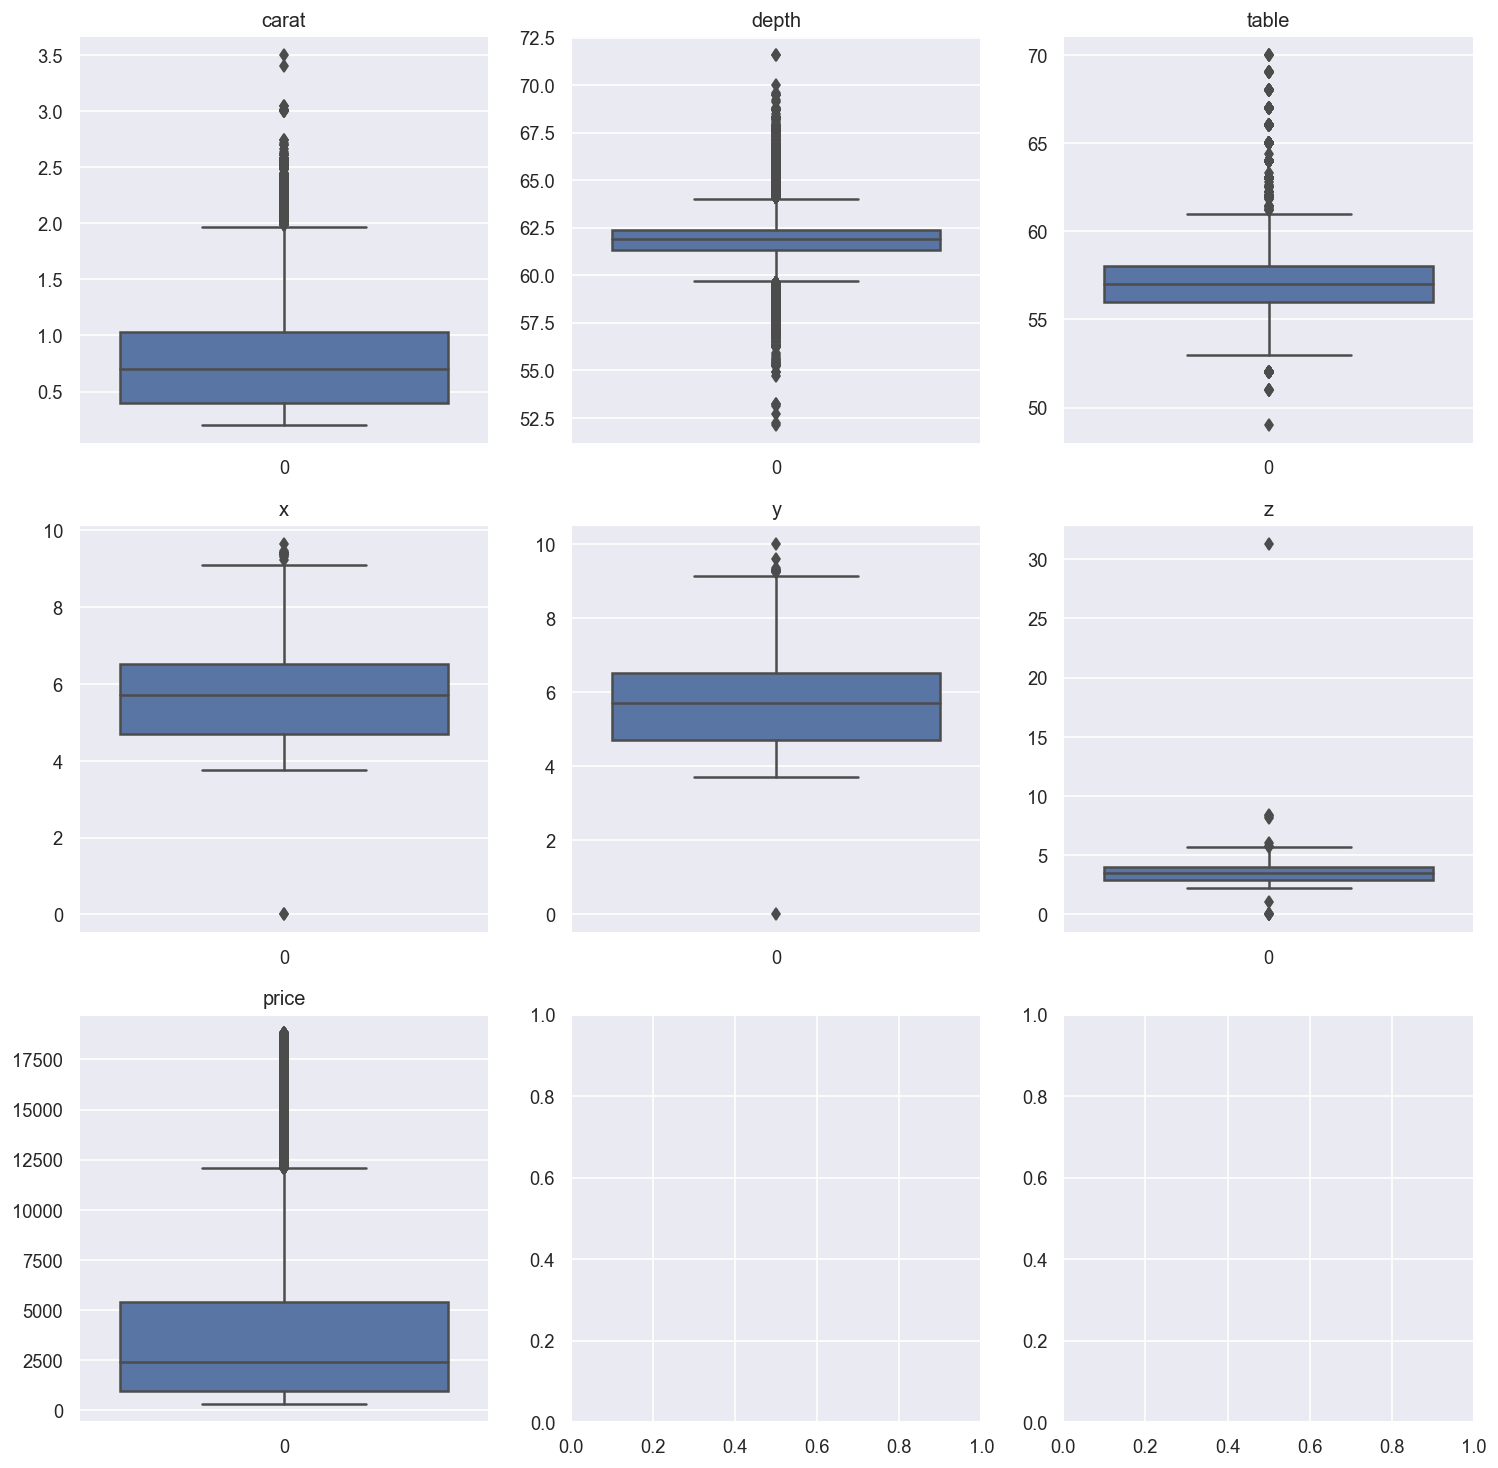

In [12]:
import math
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(df.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,15))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    sns.boxplot(data=df[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

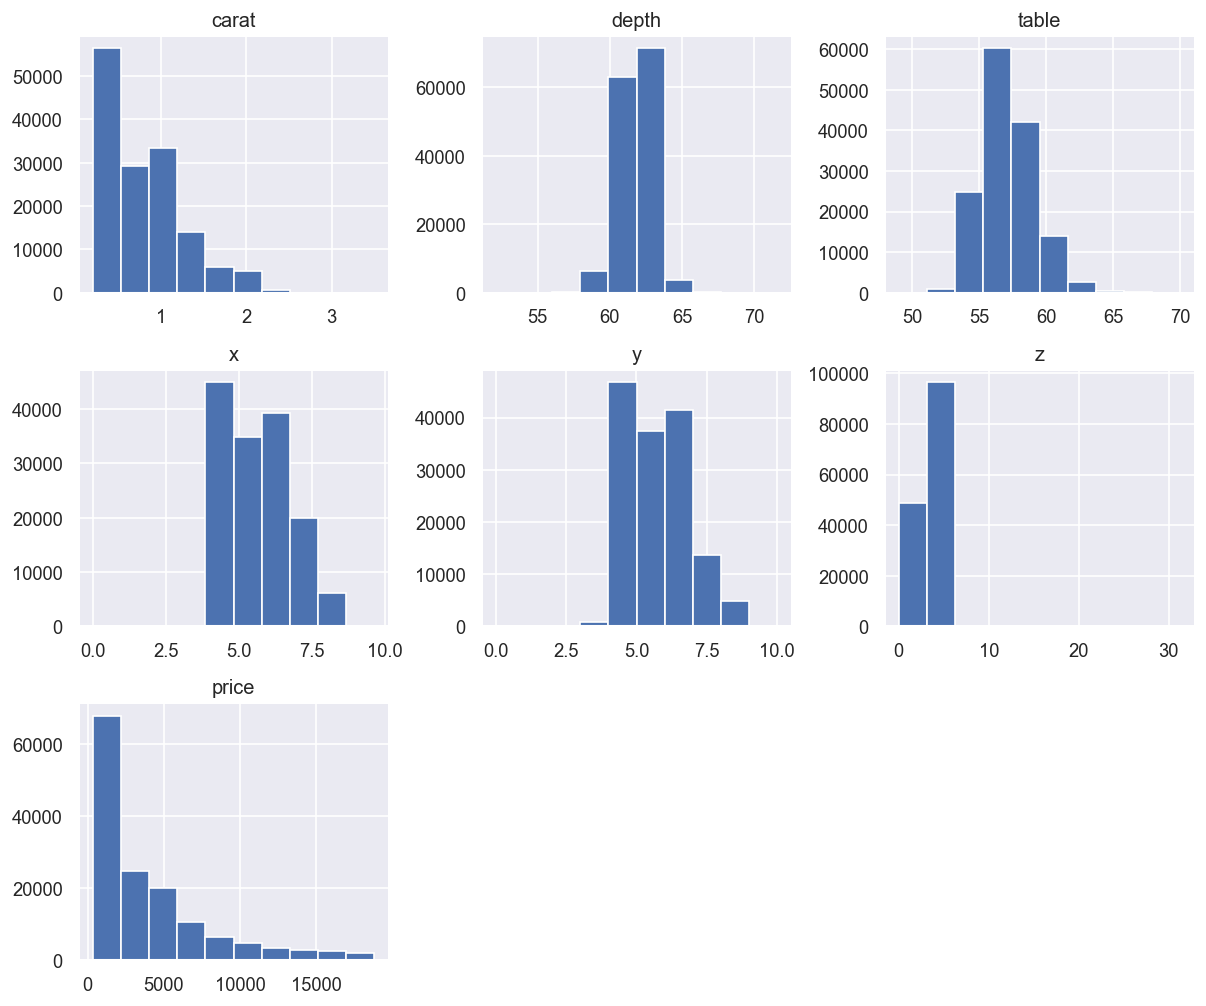

In [13]:
df.hist();

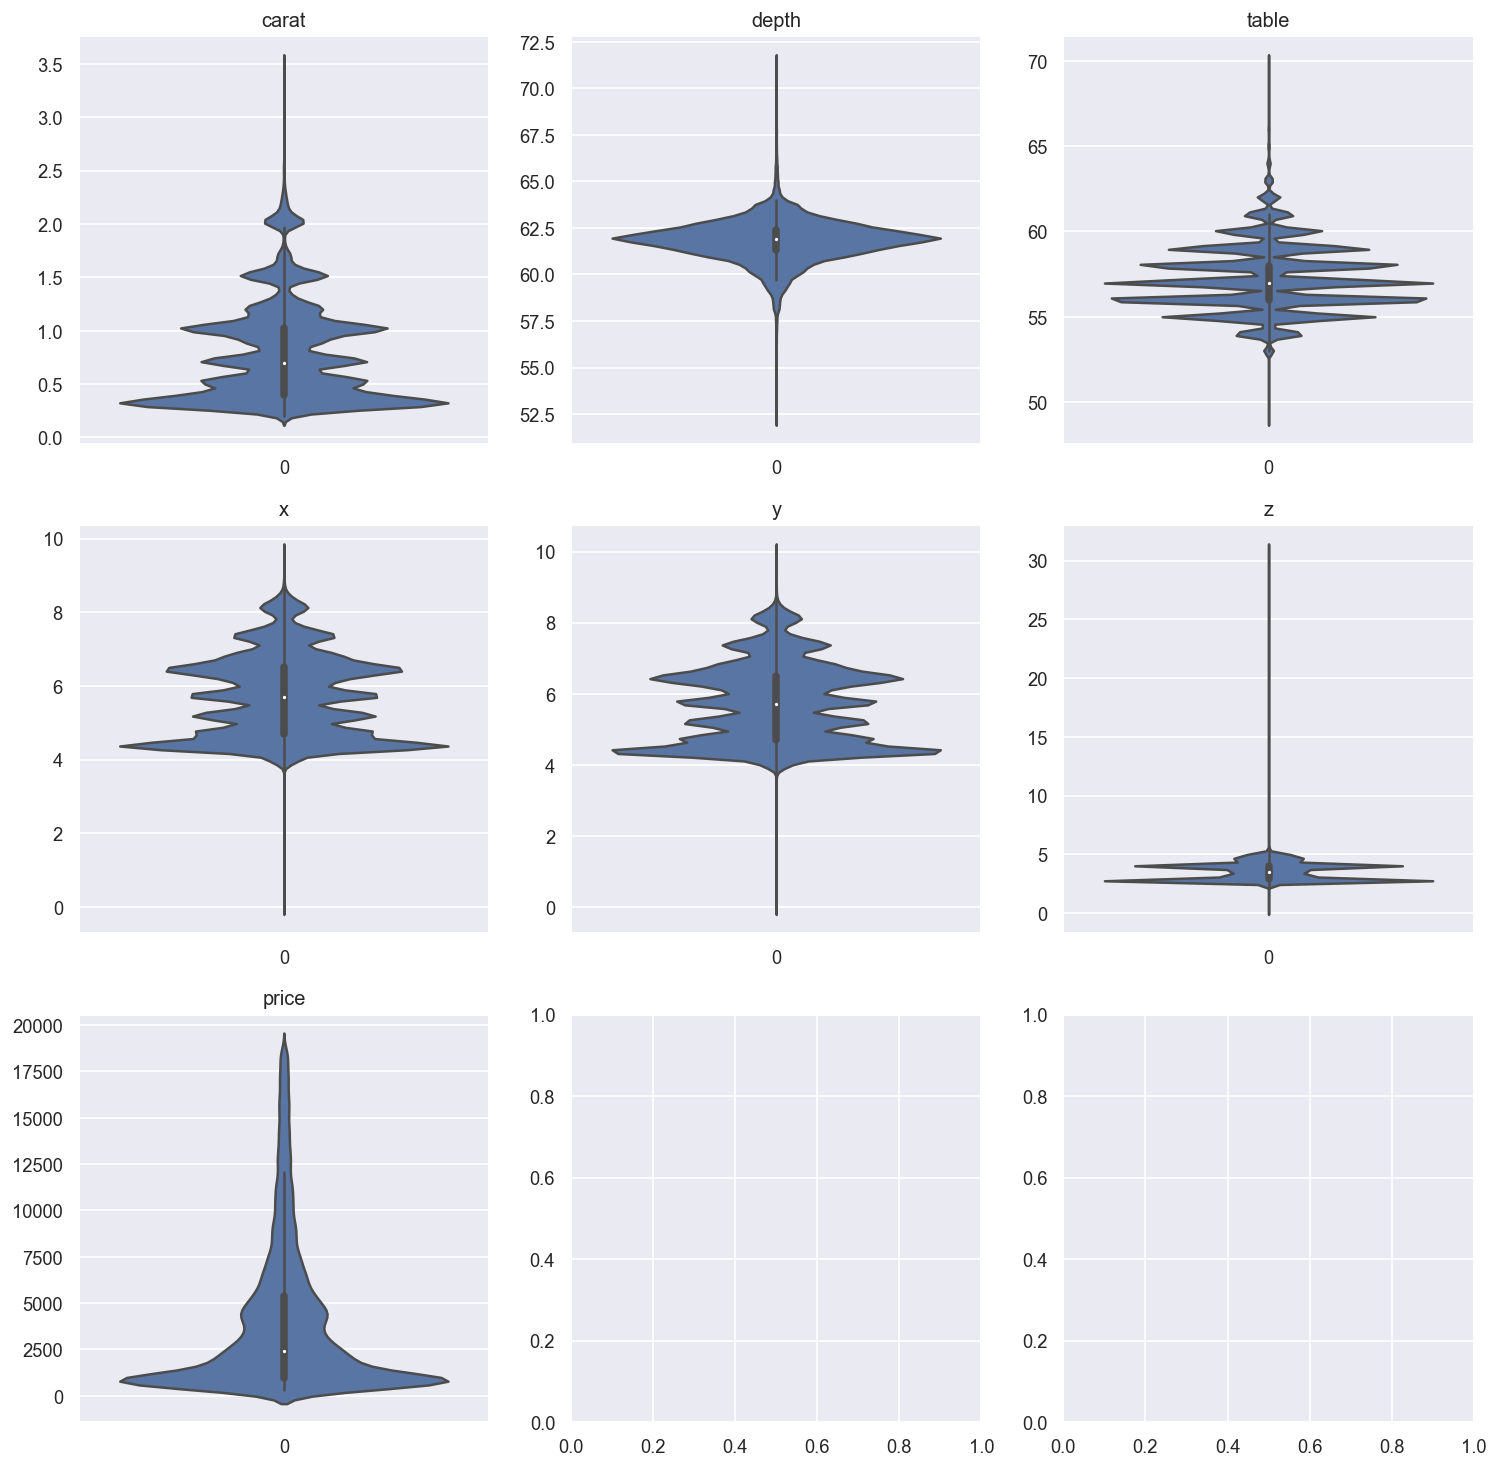

In [14]:
import math
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(df.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,15))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    sns.violinplot(data=df[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

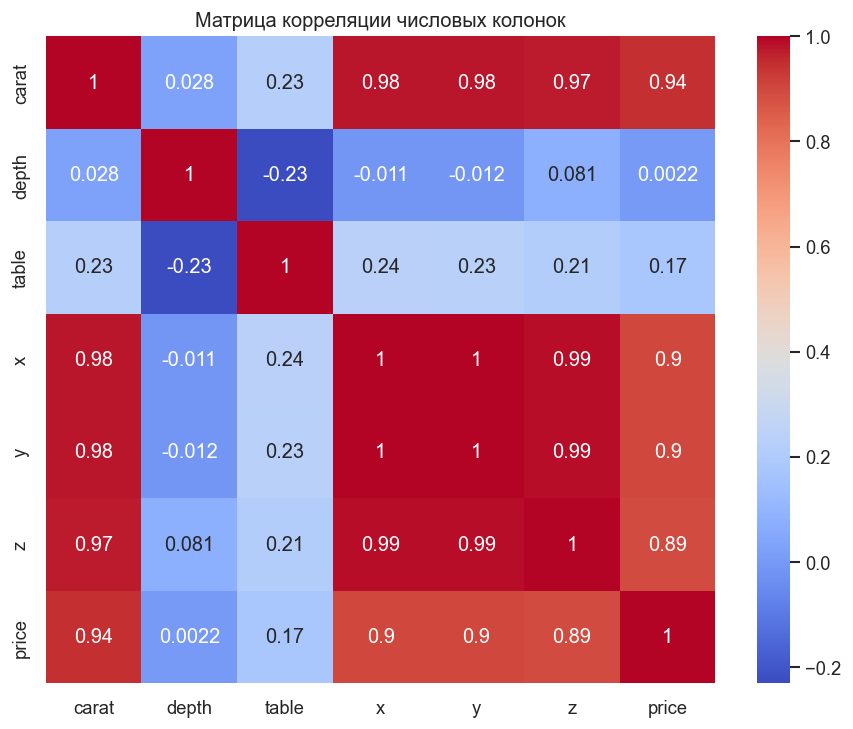

In [15]:
corr_matrix = df.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# добавляем заголовок
plt.title('Матрица корреляции числовых колонок')

# отображаем график
plt.show()

### Начинаем самое интересное

In [16]:
X = df.drop(['price'],axis=1)
y = df['price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.03,  test_size = 0.05)

In [18]:
X_test

,carat,cut,color,clarity,depth,table,x,y,z
121431,0.70,Ideal,D,VS1,62.9,54.0,5.60,5.64,3.53
127308,1.02,Good,G,SI1,63.9,60.0,6.33,6.37,4.06
13807,0.39,Ideal,E,VS2,61.9,57.0,4.73,4.71,2.92
138545,1.52,Premium,D,SI1,63.0,61.0,7.31,7.24,4.58
128812,1.51,Very Good,H,VS1,62.9,59.0,7.23,7.28,4.56
...,...,...,...,...,...,...,...,...,...
88930,0.38,Ideal,G,SI2,62.4,57.0,4.61,4.64,2.89
130844,1.09,Ideal,G,VS1,62.0,55.0,6.58,6.62,4.09
4121,0.81,Premium,F,SI2,59.9,61.0,6.08,6.05,3.66
62223,1.02,Ideal,F,VS1,62.1,57.0,6.43,6.46,4.00


In [19]:
axis_features = ['x','y','z', 'carat','depth','table'] # сюда вписываются числовые колонки
categorical_features = ['cut','color','clarity'] # сюда вписываются категориальные колонки для OneHotEncoder
# categorical_ordinal = [] # сюда вписываются категориальные в перевод в числа без приориотизации (например, бинарные 0 1)
# categorical_with_order = [] # сюда вписываются категориальные для перевода в числа с приоритизацией порядка (от 0 до N)

# здесь идет преобразование числовых
imputer_for_nums = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors = 5, missing_values=np.nan)),
    ('scaler', MinMaxScaler())
])

imputer_for_categorical_OHE = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   
    ('scaler', OneHotEncoder())
    
])

imputer_for_categorical_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OrdinalEncoder())
    
])

order_for_cat = [{
    'col':'НАЗВАНИЕ КОЛОНКИ',
    'mapping':{'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
    }]

imputer_for_categorical_with_order = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=order_for_cat)),
    ('scaler', MinMaxScaler())
    ])



CT = ColumnTransformer([
    
        ("imputer_for_nums", imputer_for_nums, axis_features), # здесь идет преобразование числовых
        ("imputer_for_categorical_OHE", imputer_for_categorical_OHE, categorical_features), ## здесь onehotencoder (страны, города и тд)
#         ("imputer_for_categorical_ordinal", imputer_for_categorical_ordinal, categorical_ordinal), # преобразование категорий в бинарные 0 1
#         ("imputer_for_categorical_with_order", imputer_for_categorical_with_order, categorical_with_order) # преобразование категорий в приоритизированный массив от 0 до N

             ], 
    
    
        remainder = 'passthrough')

display(CT)

res_ct = CT.fit_transform(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer_for_nums',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['x', 'y', 'z', 'carat', 'depth', 'table']),
                                ('imputer_for_categorical_OHE',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', OneHotEncoder())]),
                                 ['cut', 'color', 'clarity'])])

Ниже код нужен для того, чтобы на всякий случай трансформировать наши данные. Потому что в некоторых задачах проще запихнуть трансформированные данные, чем подавать вместе с ColumnTransformer-ом

In [20]:
X_train_new = pd.DataFrame(res_ct, columns=CT.get_feature_names_out())


X_train_new.T

X_test_new = pd.DataFrame(CT.transform(X_test))


X_test_new

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.313167,0.322404,0.191030,0.167260,0.539130,0.066667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.443060,0.455373,0.279070,0.281139,0.626087,0.466667,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.158363,0.153005,0.089701,0.056940,0.452174,0.266667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.617438,0.613843,0.365449,0.459075,0.547826,0.533333,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.603203,0.621129,0.362126,0.455516,0.539130,0.400000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7254,0.137011,0.140255,0.084718,0.053381,0.495652,0.266667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7255,0.487544,0.500911,0.284053,0.306050,0.460870,0.133333,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7256,0.398577,0.397086,0.212625,0.206406,0.278261,0.533333,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7257,0.460854,0.471767,0.269103,0.281139,0.469565,0.266667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
y_train_new = y_train.values

#### Дальше начинается большое количество попыток найти лучшие параметры. Но для начала я воспользовался compare_model(), который показал мне, что лучшие модели на кросс-валидации это RandomForestRegressor и GradientBoostingRegressor (но и, конечно, catboost, lightboost, xgboost)

In [22]:
# y_train_new = y_train.reset_index().drop(['index'],axis=1)

In [23]:
display(y_train_new)
display(X_train_new)

array([3540, 1265,  552, ...,  581, 4094, 1230], dtype=int64)

,imputer_for_nums__x,imputer_for_nums__y,imputer_for_nums__z,imputer_for_nums__carat,imputer_for_nums__depth,imputer_for_nums__table,imputer_for_categorical_OHE__cut_Fair,imputer_for_categorical_OHE__cut_Good,imputer_for_categorical_OHE__cut_Ideal,imputer_for_categorical_OHE__cut_Premium,...,imputer_for_categorical_OHE__color_I,imputer_for_categorical_OHE__color_J,imputer_for_categorical_OHE__clarity_I1,imputer_for_categorical_OHE__clarity_IF,imputer_for_categorical_OHE__clarity_SI1,imputer_for_categorical_OHE__clarity_SI2,imputer_for_categorical_OHE__clarity_VS1,imputer_for_categorical_OHE__clarity_VS2,imputer_for_categorical_OHE__clarity_VVS1,imputer_for_categorical_OHE__clarity_VVS2
0,0.334520,0.344262,0.189369,0.167260,0.417391,0.200000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.281139,0.289617,0.134551,0.124555,0.156522,0.266667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.085409,0.083789,0.049834,0.024911,0.478261,0.266667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.418149,0.429872,0.240864,0.238434,0.426087,0.400000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.330961,0.338798,0.194352,0.170819,0.478261,0.200000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4350,0.177936,0.169399,0.102990,0.071174,0.469565,0.400000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4351,0.362989,0.353370,0.207641,0.185053,0.486957,0.266667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4352,0.110320,0.114754,0.059801,0.035587,0.391304,0.333333,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4353,0.398577,0.408015,0.245847,0.238434,0.573913,0.333333,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
69419,0.70,Ideal,F,VS1,61.5,56.0,5.72,5.76,3.52
137471,0.58,Ideal,H,SI1,58.5,57.0,5.42,5.46,3.19
55967,0.30,Ideal,D,SI1,62.2,57.0,4.32,4.33,2.68
114149,0.90,Very Good,F,SI1,61.6,59.0,6.19,6.23,3.83
16504,0.71,Very Good,I,SI1,62.2,56.0,5.70,5.73,3.55
...,...,...,...,...,...,...,...,...,...
59918,0.43,Premium,G,VS1,62.1,59.0,4.84,4.80,3.00
15447,0.75,Ideal,H,SI2,62.3,57.0,5.88,5.81,3.63
99500,0.33,Premium,I,VS1,61.2,58.0,4.46,4.50,2.74
35978,0.90,Very Good,I,SI1,63.3,58.0,6.08,6.11,3.86


## Читерский способ поиска лучшей модели. Его и нужно использовать на КТ, потому что Шилин не запрещал

In [25]:
from pycaret.regression import *
setup(X_train_new,target=y_train_new,session_id=42,train_size= 0.8)

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Regression
3,Original data shape,"(4355, 27)"
4,Transformed data shape,"(4355, 27)"
5,Transformed train set shape,"(3484, 27)"
6,Transformed test set shape,"(871, 27)"
7,Numeric features,26
8,Preprocess,True
9,Imputation type,simple


In [26]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,323.2634,354445.4996,592.2784,0.9776,0.1140,0.0888,1.1410
lightgbm,Light Gradient Boosting Machine,340.1232,402156.3028,632.0966,0.9745,0.1174,0.0923,0.6810
et,Extra Trees Regressor,345.2756,420024.8842,645.2791,0.9734,0.1214,0.0933,0.7260
rf,Random Forest Regressor,355.4014,442190.5152,661.9365,0.9719,0.1224,0.0953,0.7860
xgboost,Extreme Gradient Boosting,357.2981,449604.4582,668.7682,0.9715,0.1207,0.0936,0.7840
gbr,Gradient Boosting Regressor,378.4237,455917.4003,672.6323,0.9712,0.1522,0.1150,0.6560
dt,Decision Tree Regressor,474.0681,802589.7328,894.7136,0.9493,0.1615,0.1222,0.5660
lr,Linear Regression,615.1959,837315.5530,910.4272,0.9472,0.5411,0.3125,1.2280
br,Bayesian Ridge,615.6559,837335.1701,910.4588,0.9472,0.5502,0.3126,0.5730
lasso,Lasso Regression,619.7518,841321.0943,913.0850,0.9469,0.5547,0.3127,0.5950


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Выбираем лучшую модель. На кросс-валидации на 10 фолдов лучшая модель оказалась GradientBoostingRegressor.
Но здесь, конечно, я не приводил нормальный ColumnTransformer, так бы результаты были получше

In [27]:
X_test

,carat,cut,color,clarity,depth,table,x,y,z
121431,0.70,Ideal,D,VS1,62.9,54.0,5.60,5.64,3.53
127308,1.02,Good,G,SI1,63.9,60.0,6.33,6.37,4.06
13807,0.39,Ideal,E,VS2,61.9,57.0,4.73,4.71,2.92
138545,1.52,Premium,D,SI1,63.0,61.0,7.31,7.24,4.58
128812,1.51,Very Good,H,VS1,62.9,59.0,7.23,7.28,4.56
...,...,...,...,...,...,...,...,...,...
88930,0.38,Ideal,G,SI2,62.4,57.0,4.61,4.64,2.89
130844,1.09,Ideal,G,VS1,62.0,55.0,6.58,6.62,4.09
4121,0.81,Premium,F,SI2,59.9,61.0,6.08,6.05,3.66
62223,1.02,Ideal,F,VS1,62.1,57.0,6.43,6.46,4.00


In [28]:
clf_list = [KNeighborsRegressor(),  RandomForestRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(), DecisionTreeRegressor()]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('preprocessing', CT),
                ('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring = 'neg_mean_absolute_percentage_error', n_jobs = -1)
    cv_list.append(cv_results['test_score'])
cv_list

[array([-0.25874888, -0.25005781, -0.2602799 , -0.24827756, -0.26175578]),
 array([-0.09243514, -0.09890518, -0.09119145, -0.0952371 , -0.09478173]),
 array([-0.11665425, -0.12004157, -0.10560641, -0.11104083, -0.11330255]),
 array([-0.09272324, -0.09581477, -0.08586201, -0.09300412, -0.09107568]),
 array([-0.11757969, -0.12992054, -0.12065415, -0.12221352, -0.12035962])]

In [29]:
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in clf_list]
cv_df

,KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),ExtraTreesRegressor(),DecisionTreeRegressor()
0,-0.258749,-0.092435,-0.116654,-0.092723,-0.117580
1,-0.250058,-0.098905,-0.120042,-0.095815,-0.129921
2,-0.260280,-0.091191,-0.105606,-0.085862,-0.120654
3,-0.248278,-0.095237,-0.111041,-0.093004,-0.122214
4,-0.261756,-0.094782,-0.113303,-0.091076,-0.120360


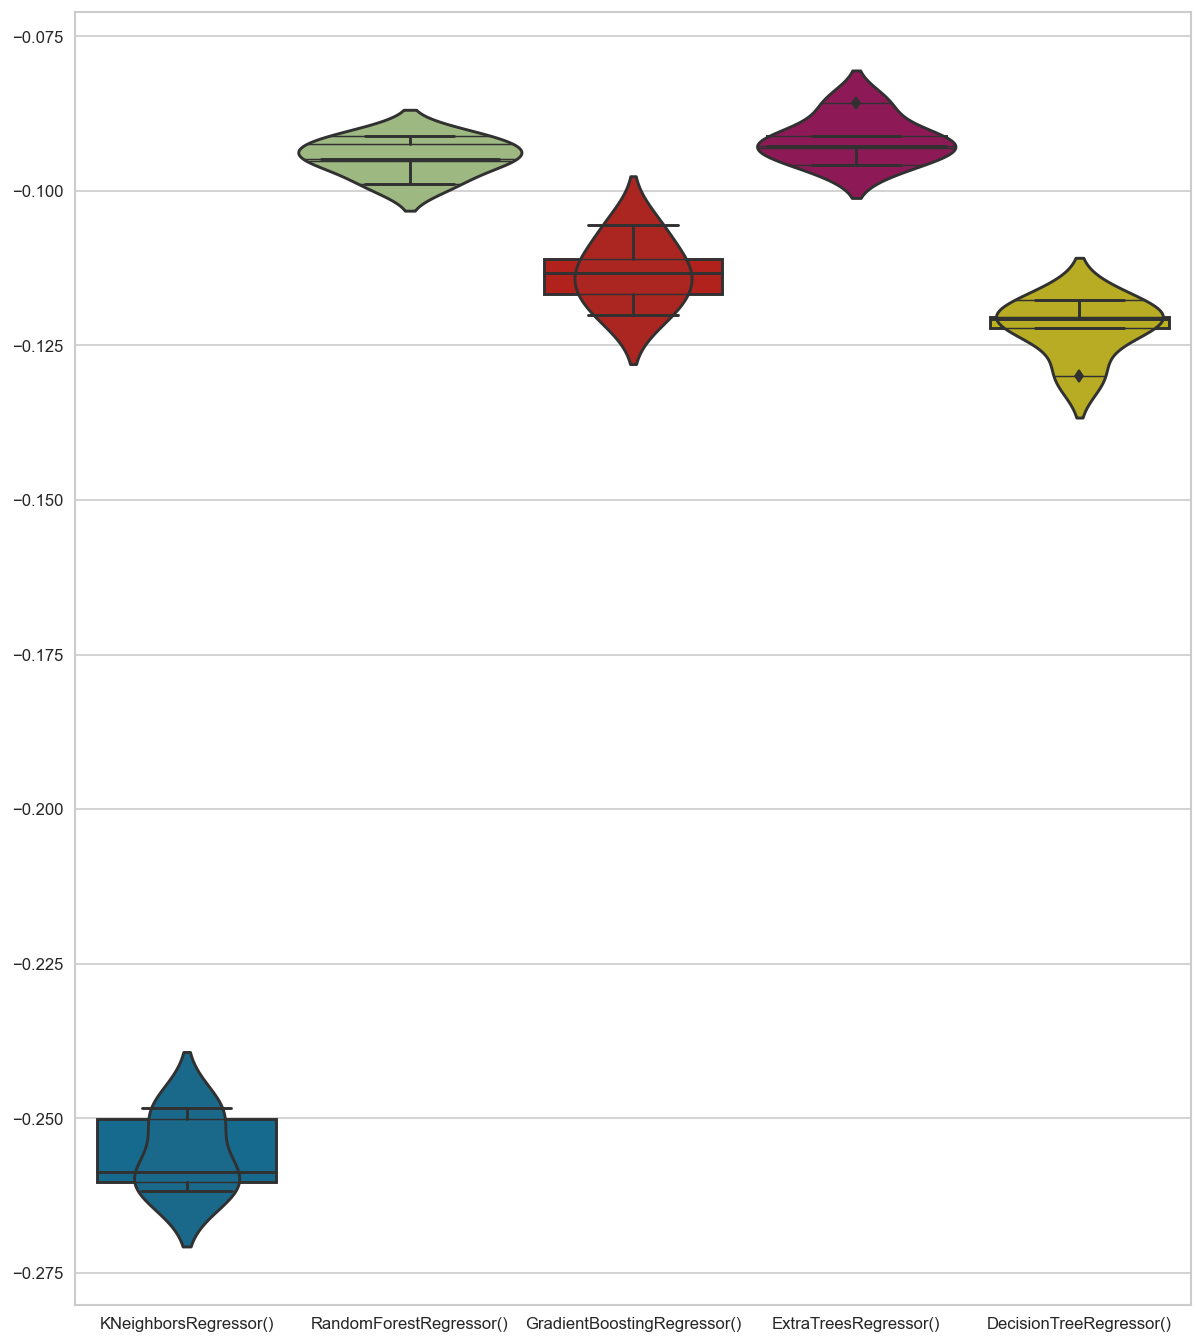

In [30]:
# Делаем самолетики без фичинга
plt.figure(figsize=(12, 14))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

In [31]:
clf_list = [LinearRegression(),  Lasso(), Ridge(), ElasticNet(), SVR()]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('preprocessing', CT),
                ('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring = 'neg_mean_absolute_percentage_error', n_jobs = -1)
    cv_list.append(cv_results['test_score'])
cv_list

[array([-0.30232666, -0.30424137, -0.29503029, -0.32225993, -0.3172122 ]),
 array([-0.29678667, -0.30200465, -0.3006255 , -0.32281446, -0.3145915 ]),
 array([-0.34578934, -0.34895574, -0.35054801, -0.35389925, -0.3612143 ]),
 array([-1.3796541 , -1.32671001, -1.38182546, -1.37324087, -1.53074917]),
 array([-0.99076679, -1.01144441, -1.00514535, -1.04532824, -1.09178274])]

In [32]:
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in clf_list]
cv_df

,LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR()
0,-0.302327,-0.296787,-0.345789,-1.379654,-0.990767
1,-0.304241,-0.302005,-0.348956,-1.326710,-1.011444
2,-0.295030,-0.300626,-0.350548,-1.381825,-1.005145
3,-0.322260,-0.322814,-0.353899,-1.373241,-1.045328
4,-0.317212,-0.314591,-0.361214,-1.530749,-1.091783


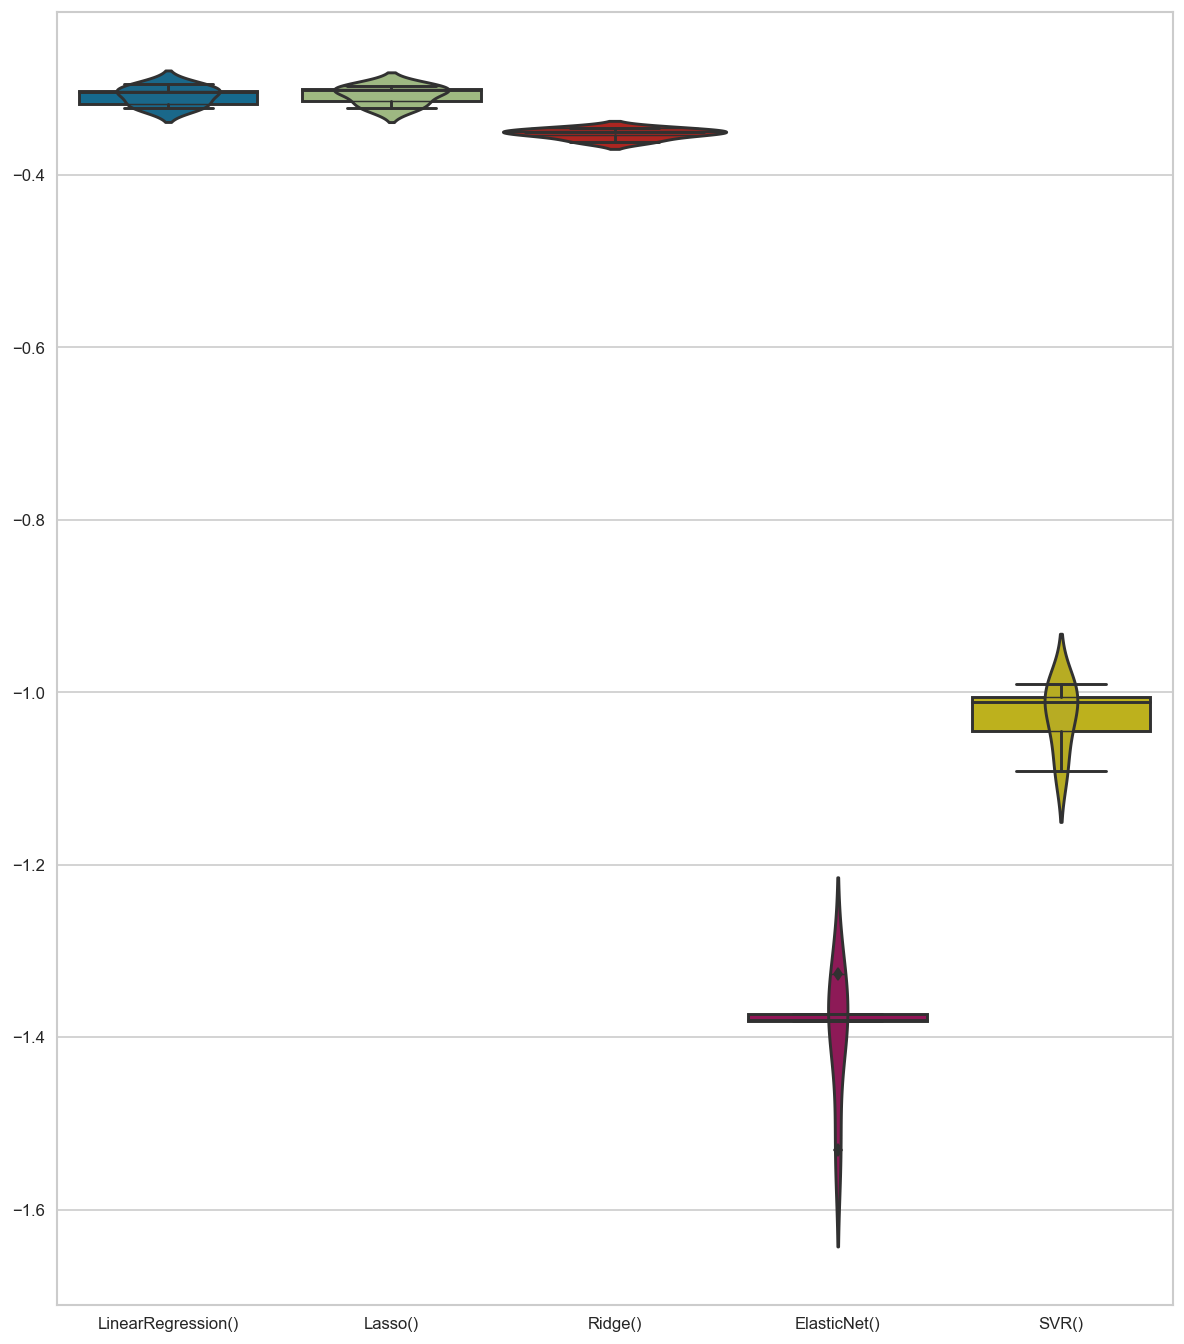

In [33]:
# Делаем самолетики без фичинга
plt.figure(figsize=(12, 14))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

## Ниже код для подбора параметров RandomForest

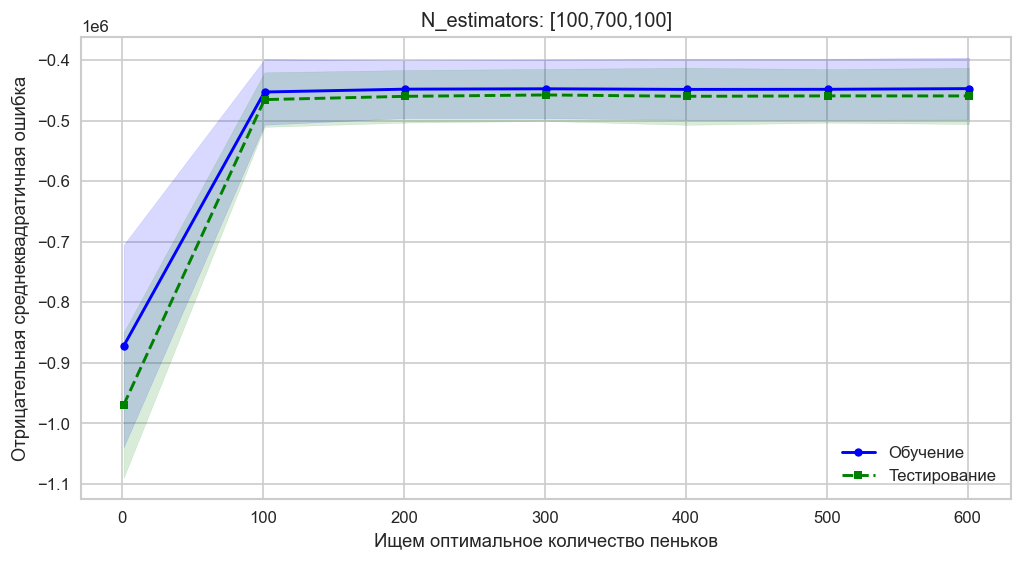

In [34]:
# Подбираем кол-во estimator , чем больше тем лучше, но слишком много тоже не нужно, поищем когда уменьшится улучшение модели

n_estimators = np.arange(1,700,100)
scores_train = []
scores_test = []
for i in n_estimators:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', RandomForestRegressor(n_estimators=i, n_jobs = -1))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('N_estimators: [100,700,100]')
plt.plot(n_estimators, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(n_estimators, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(n_estimators, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(n_estimators, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем оптимальное количество пеньков')
plt.ylabel('Отрицательная среднеквадратичная ошибка')
plt.legend(loc='lower right')
plt.show()

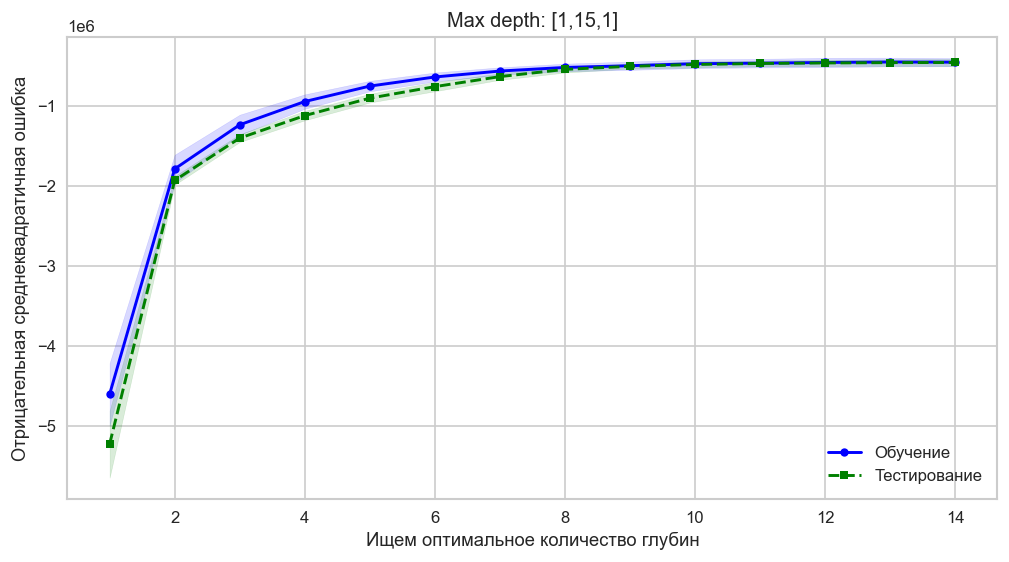

In [35]:
# Подбираем максимальную глубину леса пеньков max_depth

max_depth = np.arange(1,15,1)
scores_train = []
scores_test = []
for i in max_depth:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', RandomForestRegressor(n_estimators=100, max_depth = i, n_jobs=-1))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Max depth: [1,15,1]')
plt.plot(max_depth, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(max_depth, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(max_depth, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(max_depth, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем оптимальное количество глубин')
plt.ylabel('Отрицательная среднеквадратичная ошибка')
plt.legend(loc='lower right')
plt.show()

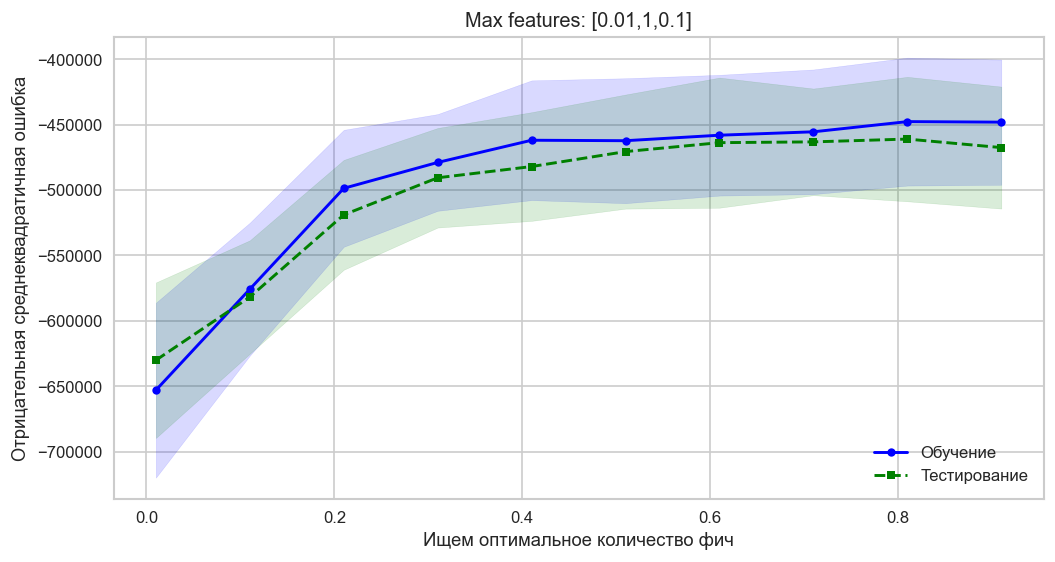

In [36]:
# Подбираем количество фич, используемое для обучения одного пенька

max_features = np.arange(0.01,1,0.1)
scores_train = []
scores_test = []
for i in max_features:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', RandomForestRegressor(n_estimators=100, max_features = i, n_jobs=-1))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Max features: [0.01,1,0.1]')
plt.plot(max_features, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(max_features, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(max_features, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(max_features, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем оптимальное количество фич')
plt.ylabel('Отрицательная среднеквадратичная ошибка')
plt.legend(loc='lower right')
plt.show()

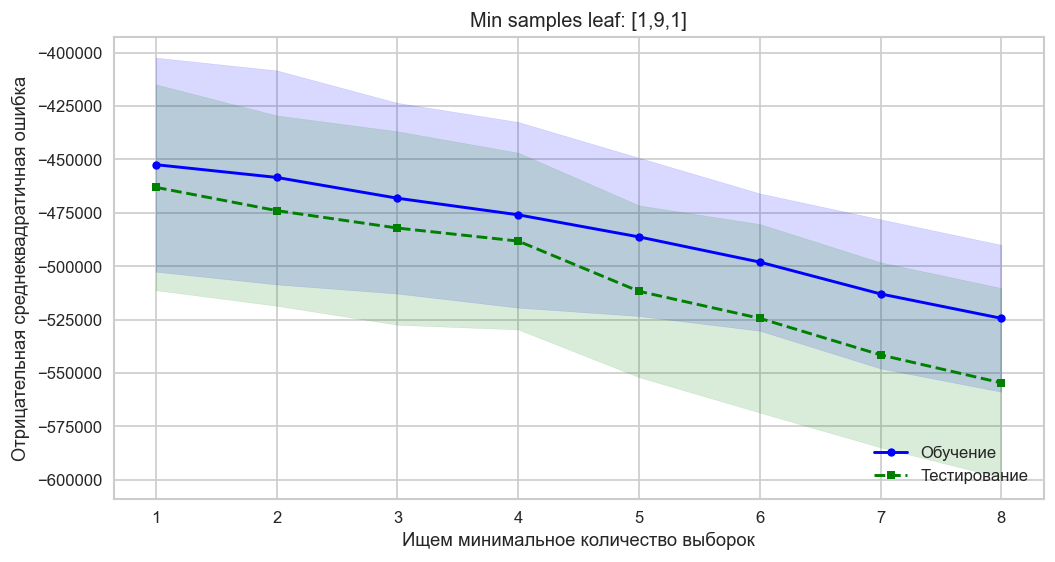

In [37]:
#Подбираем минимальное количество выборок для узла min_samples_leaf 

min_samples_leaf = np.arange(1,9,1)
scores_train = []
scores_test = []
for i in min_samples_leaf:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', RandomForestRegressor(n_estimators=100, min_samples_leaf = i, n_jobs=-1))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Min samples leaf: [1,9,1]')
plt.plot(min_samples_leaf, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(min_samples_leaf, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(min_samples_leaf, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(min_samples_leaf, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем минимальное количество выборок')
plt.ylabel('Отрицательная среднеквадратичная ошибка')
plt.legend(loc='lower right')
plt.show()

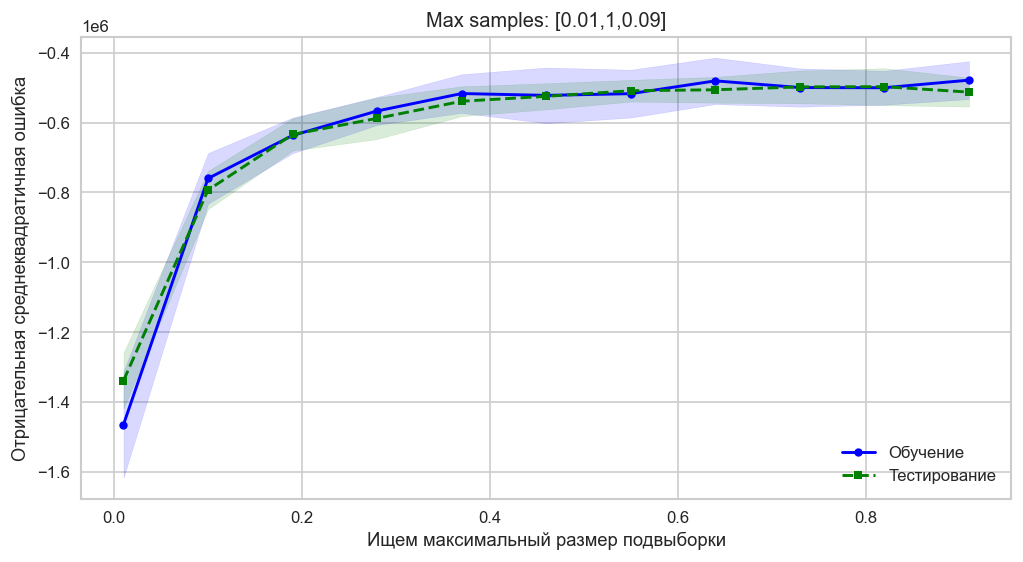

In [38]:
# Подбираем кол-во максимальной выборки max_samples
max_samples = np.arange(0.01,1,0.09)
scores_train = []
scores_test = []
for i in max_samples:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', RandomForestRegressor(n_estimators=10, max_samples = i, n_jobs=-1))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Max samples: [0.01,1,0.09]')
plt.plot(max_samples, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(max_samples, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(max_samples, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(max_samples, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем максимальный размер подвыборки')
plt.ylabel('Отрицательная среднеквадратичная ошибка')
plt.legend(loc='lower right')
plt.show()

## Подбор модели RF "методом тыка" на основе графиков выше. 

Просматриваем первые два показателя целевую метрику на трейне и на тесте. А следующие 2 показателя нецелевая метрика тоже на трейне и на тесте

In [40]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', RandomForestRegressor(n_jobs = -1, criterion = 'friedman_mse', n_estimators = 300, max_depth = 12, 
                                                   max_features = 0.8, min_samples_leaf = 1))])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)
print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 0.06319116287020438
Test: 0.10024514658332433
Train: 0.06319116287020438
Test: 0.10024514658332433


А здесь просмотрим эту же модель на кросс-валидации на 5 фолдов

In [41]:
cv_list = []
pipe = Pipeline([('preprocessing', CT),
                ('classifier', RandomForestRegressor(n_jobs = -1, n_estimators = 200, max_depth = 1, 
                                                   max_features = 0.8, min_samples_leaf = 1))])
    #pipe.fit(X_train, y_train)
cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring = 'neg_mean_absolute_percentage_error', n_jobs = -1)
cv_list.append(cv_results['test_score'])
cv_list

[array([-1.02884187, -1.08243195, -1.00842237, -1.06775623, -1.16117074])]

## Подбор RF с помощью сетки

In [42]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', RandomForestRegressor(max_features=0.8))])

n_estimators  = np.arange(100,300,50)
# min_samples_leaf = [3,5,7]
max_depth = [8,10,12,14]

# subsample= [0.1,0.5,1]

param_grid = [
    {'preprocessing': [CT],
    'classifier': [RandomForestRegressor(max_features=0.7)],
     'classifier__n_estimators': n_estimators,
#      'classifier__min_samples_leaf': min_samples_leaf,
     'classifier__max_depth': max_depth

#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка

# cross_val = StratifiedShuffleSplit(n_splits=3)
# cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=5,
                    return_train_score = True,
                   n_jobs = -1, scoring = 'neg_mean_absolute_percentage_error') # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['x',
                                                                          'y',
                                                                          'z',
                                                                          'carat',
                                                                          'depth',
                                                                          'table']),
                                                                        ('imputer_for_categorical_OHE',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('scal...
                                                              transformers=[('imputer_for_nums',
                                                                             Pipeline(steps=[('imputer',
                                                                                              KNNImputer()),
                                                                                             ('scaler',
                                                                                              MinMaxScaler())]),
                                                                             ['x',
                                                                              'y',
                                                                              'z',
                                                                              'carat',
                                                                              'depth',
                                                                              'table']),
                                                                            ('imputer_for_categorical_OHE',
                                                                             Pipeline(steps=[('imputer',
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('scaler',
                                                                                              OneHotEncoder())]),
                                                                             ['cut',
                                                                              'color',
                                                                              'clarity'])])]}],
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

<AxesSubplot: xlabel='param_classifier__max_depth', ylabel='param_classifier__n_estimators'>

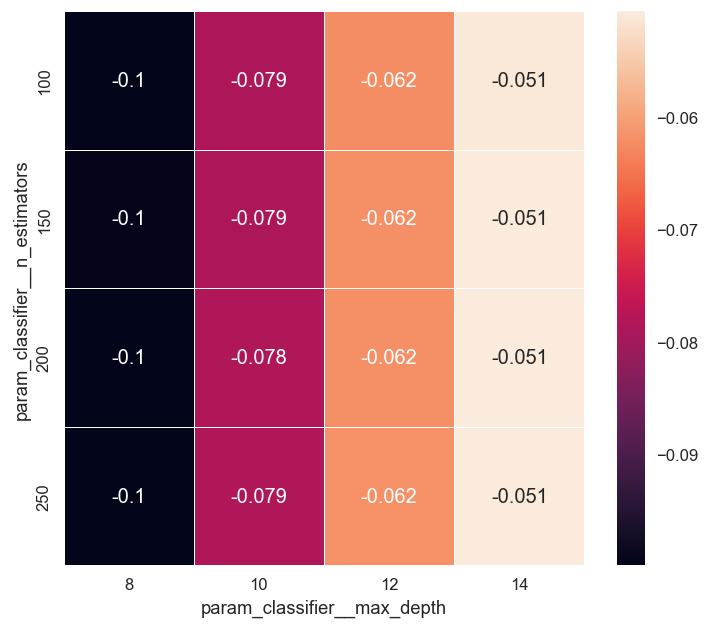

In [43]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__n_estimators',columns='param_classifier__max_depth',values='mean_train_score')
pv_table
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

<AxesSubplot: xlabel='param_classifier__max_depth', ylabel='param_classifier__n_estimators'>

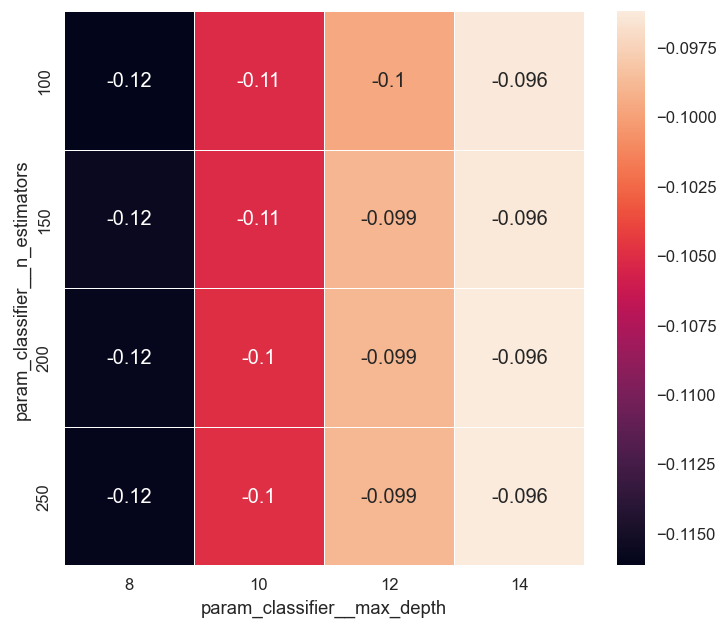

In [44]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__n_estimators',columns='param_classifier__max_depth',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [45]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,15,14,12,13,11,10,9,8,7,6,4,5,1,2,3,0
mean_fit_time,3.467736,3.126216,1.688418,2.503963,3.66717,2.934806,2.218009,1.518942,3.133533,2.319333,1.347629,1.82133,1.456348,1.865263,2.334735,0.97121
std_fit_time,0.143976,0.091122,0.202581,0.241754,0.476644,0.35153,0.312709,0.151721,0.305237,0.020865,0.146243,0.152809,0.061803,0.052658,0.048069,0.041135
mean_score_time,0.046811,0.04534,0.033808,0.04301,0.063814,0.047811,0.040209,0.038209,0.054012,0.04241,0.02601,0.033808,0.031007,0.037682,0.049014,0.023405
std_score_time,0.003545,0.003154,0.007251,0.002098,0.015135,0.00172,0.007469,0.012705,0.007073,0.00049,0.001096,0.001166,0.001674,0.001139,0.006291,0.00102
param_classifier,"RandomForestRegressor(max_depth=14, max_featur...","RandomForestRegressor(max_depth=14, max_featur...","RandomForestRegressor(max_depth=14, max_featur...","RandomForestRegressor(max_depth=14, max_featur...","RandomForestRegressor(max_depth=14, max_featur...","RandomForestRegressor(max_depth=14, max_featur...","RandomForestRegressor(max_depth=14, max_featur...","RandomForestRegressor(max_depth=14, max_featur...","RandomForestRegressor(max_depth=14, max_featur...","RandomForestRegressor(max_depth=14, max_featur...","RandomForestRegressor(max_depth=14, max_featur...","RandomForestRegressor(max_depth=14, max_featur...","RandomForestRegressor(max_depth=14, max_featur...","RandomForestRegressor(max_depth=14, max_featur...","RandomForestRegressor(max_depth=14, max_featur...","RandomForestRegressor(max_depth=14, max_featur..."
param_classifier__max_depth,14,14,14,14,12,12,12,12,10,10,10,10,8,8,8,8
param_classifier__n_estimators,250,200,100,150,250,200,150,100,250,200,100,150,150,200,250,100
param_preprocessing,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ..."
params,{'classifier': RandomForestRegressor(max_depth...,{'classifier': RandomForestRegressor(max_depth...,{'classifier': RandomForestRegressor(max_depth...,{'classifier': RandomForestRegressor(max_depth...,{'classifier': RandomForestRegressor(max_depth...,{'classifier': RandomForestRegressor(max_depth...,{'classifier': RandomForestRegressor(max_depth...,{'classifier': RandomForestRegressor(max_depth...,{'classifier': RandomForestRegressor(max_depth...,{'classifier': RandomForestRegressor(max_depth...,{'classifier': RandomForestRegressor(max_depth...,{'classifier': RandomForestRegressor(max_depth...,{'classifier': RandomForestRegressor(max_depth...,{'classifier': RandomForestRegressor(max_depth...,{'classifier': RandomForestRegressor(max_depth...,{'classifier': RandomForestRegressor(max_depth...
split0_test_score,-0.093551,-0.093662,-0.093634,-0.093666,-0.096172,-0.096562,-0.097432,-0.097216,-0.102763,-0.103301,-0.102555,-0.103098,-0.113395,-0.113823,-0.113663,-0.114748


## Подбор модели KNN с помощью сетки и тепловой матрицы

In [46]:
# from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', KNeighborsRegressor())])

n_neighbors  = np.arange(1,200,10)
p= [1,2,3]
weights = ['uniform']

param_grid = [
    {'preprocessing': [CT],
    'classifier': [KNeighborsRegressor()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка


# cross_val = StratifiedShuffleSplit(n_splits=3)
# cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=KFold(5),
                    return_train_score = True,
                   n_jobs = -1, scoring = 'neg_mean_absolute_percentage_error') # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['x',
                                                                          'y',
                                                                          'z',
                                                                          'carat',
                                                                          'depth',
                                                                          'table']),
                                                                        ('imputer_for_categorical_OHE',
                                                                         Pipeline(steps=[('imputer'...
                                                              transformers=[('imputer_for_nums',
                                                                             Pipeline(steps=[('imputer',
                                                                                              KNNImputer()),
                                                                                             ('scaler',
                                                                                              MinMaxScaler())]),
                                                                             ['x',
                                                                              'y',
                                                                              'z',
                                                                              'carat',
                                                                              'depth',
                                                                              'table']),
                                                                            ('imputer_for_categorical_OHE',
                                                                             Pipeline(steps=[('imputer',
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('scaler',
                                                                                              OneHotEncoder())]),
                                                                             ['cut',
                                                                              'color',
                                                                              'clarity'])])]}],
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

###  На тепловой карте ниже нужно искать оптимальный показатель. Если мы говорим про MAPE, то чем меньше тем лучше, но опять же таки KNN не подходит для данной задачи, но кто знает, что будет на экзамене

<AxesSubplot: xlabel='param_classifier__p', ylabel='param_classifier__n_neighbors'>

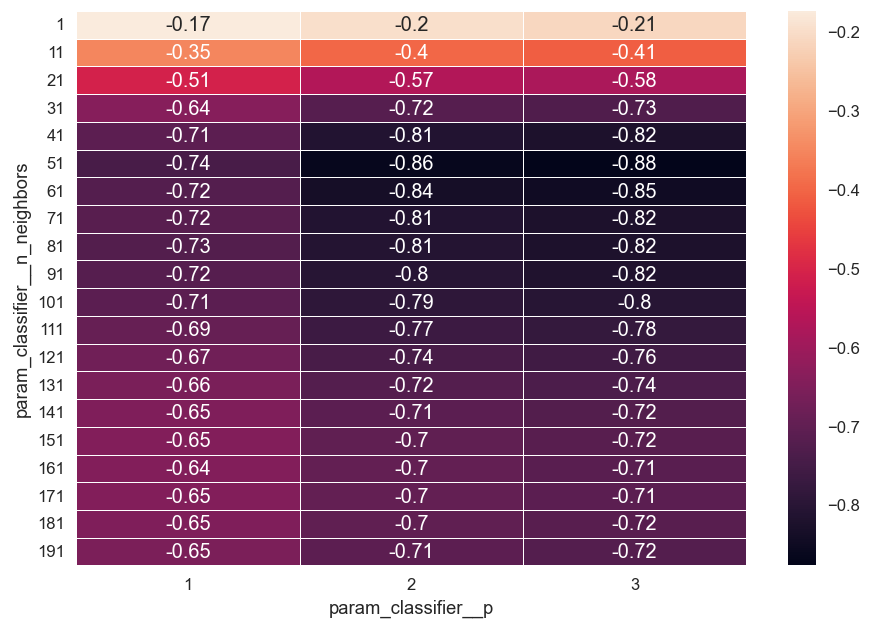

In [47]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__n_neighbors',columns='param_classifier__p',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

Традиционный способ найти лучшую модель (у нее будет ранк 1)

In [48]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,0,1,2,3,4,5,6,7,8,9,...,22,13,29,26,14,23,19,20,16,17
mean_fit_time,0.011604,0.015803,0.018604,0.017204,0.016604,0.017004,0.016804,0.019805,0.017105,0.017604,...,0.017604,0.018604,0.016203,0.026606,0.017404,0.016203,0.015804,0.016404,0.016404,0.017604
std_fit_time,0.001356,0.003188,0.00049,0.000748,0.00049,0.000633,0.000981,0.00343,0.001019,0.001744,...,0.00049,0.002417,0.0004,0.009267,0.001357,0.000749,0.0004,0.00049,0.001357,0.001357
mean_score_time,0.220848,0.161435,1.457327,0.146833,0.057813,1.351812,0.128229,0.065415,1.321306,0.153535,...,0.076617,0.069815,1.382711,1.604466,1.380911,1.352743,0.069616,1.343502,0.068215,1.391713
std_score_time,0.004021,0.00196,0.051217,0.04313,0.002639,0.063563,0.002483,0.007738,0.050177,0.009299,...,0.003775,0.005565,0.013188,0.171327,0.079144,0.016428,0.00049,0.010799,0.002401,0.072773
param_classifier,"KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)",...,"KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)","KNeighborsRegressor(n_neighbors=1, p=1)"
param_classifier__n_neighbors,1,1,1,11,11,11,21,21,21,31,...,71,41,91,81,41,71,61,61,51,51
param_classifier__p,1,2,3,1,2,3,1,2,3,1,...,2,2,3,3,3,3,2,3,2,3
param_classifier__weights,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...",...,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ..."
params,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'

## Подбор GB для регрессии. 
Здесь нужно подходить очень делекатно. Данный блок ниже - пилотный. Как правильно делать - никто не знает. Нужно находить такую модель, у которой на трейне и на тесте MSE низкий. А ниже я представил также вариант с сеткой, хотя Шилин говорил, что так не делают.

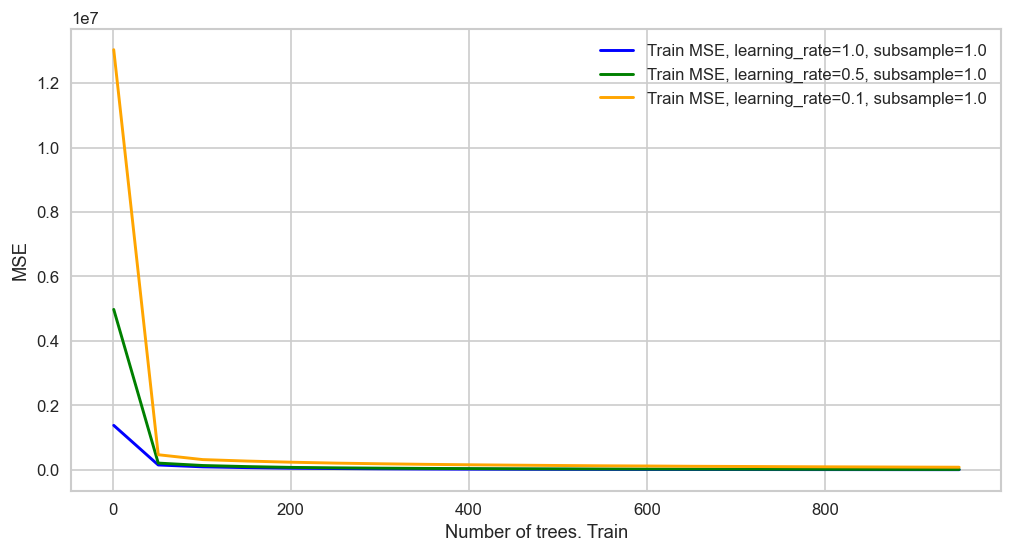

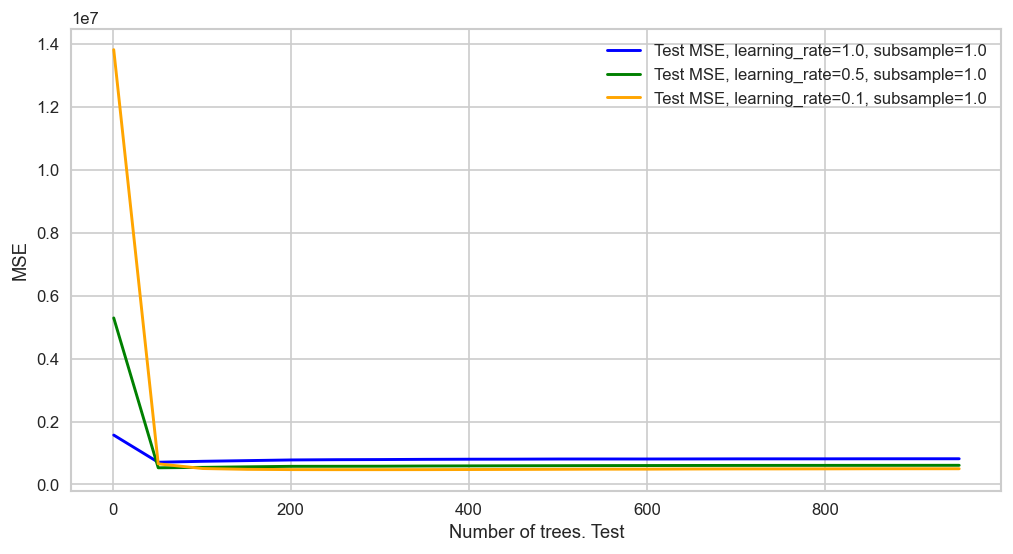

In [49]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Задаем параметры моделей
params1 = {'learning_rate': 1.0, 'subsample': 1.0}
params2 = {'learning_rate': 0.5, 'subsample': 1.0}
params3 = {'learning_rate': 0.1, 'subsample': 1.0}
# {"learning_rate": 0.1, "subsample": 1.0, "max_features": 'sqrt'}
# {"learning_rate": 0.1, "subsample": 1.0, "min_samples_split" : 5}
# {"learning_rate": 0.1, "subsample": 0.75}
# params3= {"learning_rate": 0.1, "subsample": 0.75, "min_samples_split" : 5}
# params3= {"learning_rate": 0.01, "subsample": 0.5, "min_samples_split" : 5, "max_features": 'sqrt'}

# Инициализируем модели
reg1 = GradientBoostingRegressor(**params1, random_state=42)
reg2 = GradientBoostingRegressor(**params2, random_state=42)
reg3 = GradientBoostingRegressor(**params3, random_state=42)

# Обучаем модели на train данных и сохраняем ошибки на train и test данных
train_errors1, test_errors1 = [], []
train_errors2, test_errors2 = [], []
train_errors3, test_errors3 = [], []
for n in range(1, 1000, 50):
    
    reg1 = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingRegressor(**params1, random_state=42, n_estimators = n))])
        
    reg2 = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingRegressor(**params2, random_state=42, n_estimators = n))])
        
    reg3 = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingRegressor(**params3, random_state=42, n_estimators = n))])
    
    reg1.fit(X_train, y_train)
    reg2.fit(X_train, y_train)
    reg3.fit(X_train, y_train)
    y_train_pred1 = reg1.predict(X_train)
    y_test_pred1 = reg1.predict(X_test)
    y_train_pred2 = reg2.predict(X_train)
    y_test_pred2 = reg2.predict(X_test)
    y_train_pred3 = reg3.predict(X_train)
    y_test_pred3 = reg3.predict(X_test)
    train_errors1.append(mean_squared_error(y_train, y_train_pred1))
    test_errors1.append(mean_squared_error(y_test, y_test_pred1))
    train_errors2.append(mean_squared_error(y_train, y_train_pred2))
    test_errors2.append(mean_squared_error(y_test, y_test_pred2))
    train_errors3.append(mean_squared_error(y_train, y_train_pred3))
    test_errors3.append(mean_squared_error(y_test, y_test_pred3))

# Строим график MSE на train и test данных для каждой модели
plt.figure(figsize=(10,5))
plt.plot(range(1, 1000,50), train_errors1, label='Train MSE, learning_rate=1.0, subsample=1.0', color='blue')
plt.plot(range(1, 1000,50), train_errors2, label='Train MSE, learning_rate=0.5, subsample=1.0', color='green')
plt.plot(range(1, 1000,50), train_errors3, label='Train MSE, learning_rate=0.1, subsample=1.0', color='orange')
plt.xlabel('Number of trees. Train')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(range(1, 1000,50), test_errors1, label='Test MSE, learning_rate=1.0, subsample=1.0', color='blue')
plt.plot(range(1, 1000,50), test_errors2, label='Test MSE, learning_rate=0.5, subsample=1.0', color='green')
plt.plot(range(1, 1000,50), test_errors3, label='Test MSE, learning_rate=0.1, subsample=1.0', color='orange')
plt.xlabel('Number of trees. Test')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [50]:
pipe = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingRegressor())])

n_estimators  = np.arange(100,500,50)
# min_samples_leaf = [1,3,5,7,9,11]
learning_rate = np.arange(0.01,1,0.05)
# subsample= [0.1,0.5,1]

param_grid = [
    {'preprocessing': [CT],
    'classifier': [GradientBoostingRegressor()],
     'classifier__n_estimators': n_estimators,
#      'classifier__min_samples_leaf': min_samples_leaf
     'classifier__learning_rate': learning_rate
    }
] #решетка


grid = GridSearchCV(pipe,param_grid, cv=KFold(5),
                    return_train_score = True,
                   n_jobs = -1, scoring = 'neg_mean_absolute_percentage_error' ) # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['x',
                                                                          'y',
                                                                          'z',
                                                                          'carat',
                                                                          'depth',
                                                                          'table']),
                                                                        ('imputer_for_categorical_OHE',
                                                                         Pipeline(steps=[('imputer'...
                                                              transformers=[('imputer_for_nums',
                                                                             Pipeline(steps=[('imputer',
                                                                                              KNNImputer()),
                                                                                             ('scaler',
                                                                                              MinMaxScaler())]),
                                                                             ['x',
                                                                              'y',
                                                                              'z',
                                                                              'carat',
                                                                              'depth',
                                                                              'table']),
                                                                            ('imputer_for_categorical_OHE',
                                                                             Pipeline(steps=[('imputer',
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('scaler',
                                                                                              OneHotEncoder())]),
                                                                             ['cut',
                                                                              'color',
                                                                              'clarity'])])]}],
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

#### Матрица на трейне и на тесте. Ищем тот параметр, который и там и там хороший и с небольшой разницей

<AxesSubplot: xlabel='param_classifier__learning_rate', ylabel='param_classifier__n_estimators'>

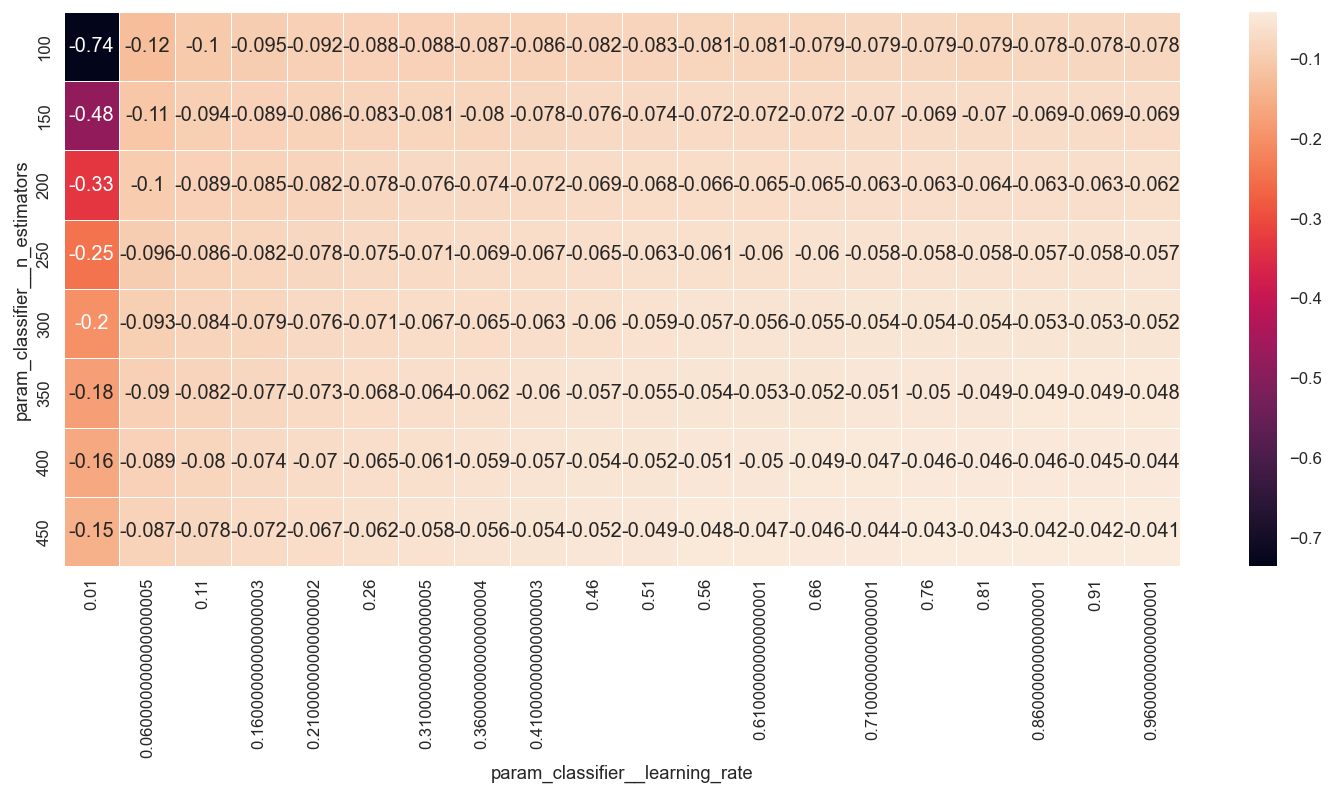

In [51]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__n_estimators',columns='param_classifier__learning_rate',values='mean_train_score')
pv_table
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

<AxesSubplot: xlabel='param_classifier__learning_rate', ylabel='param_classifier__n_estimators'>

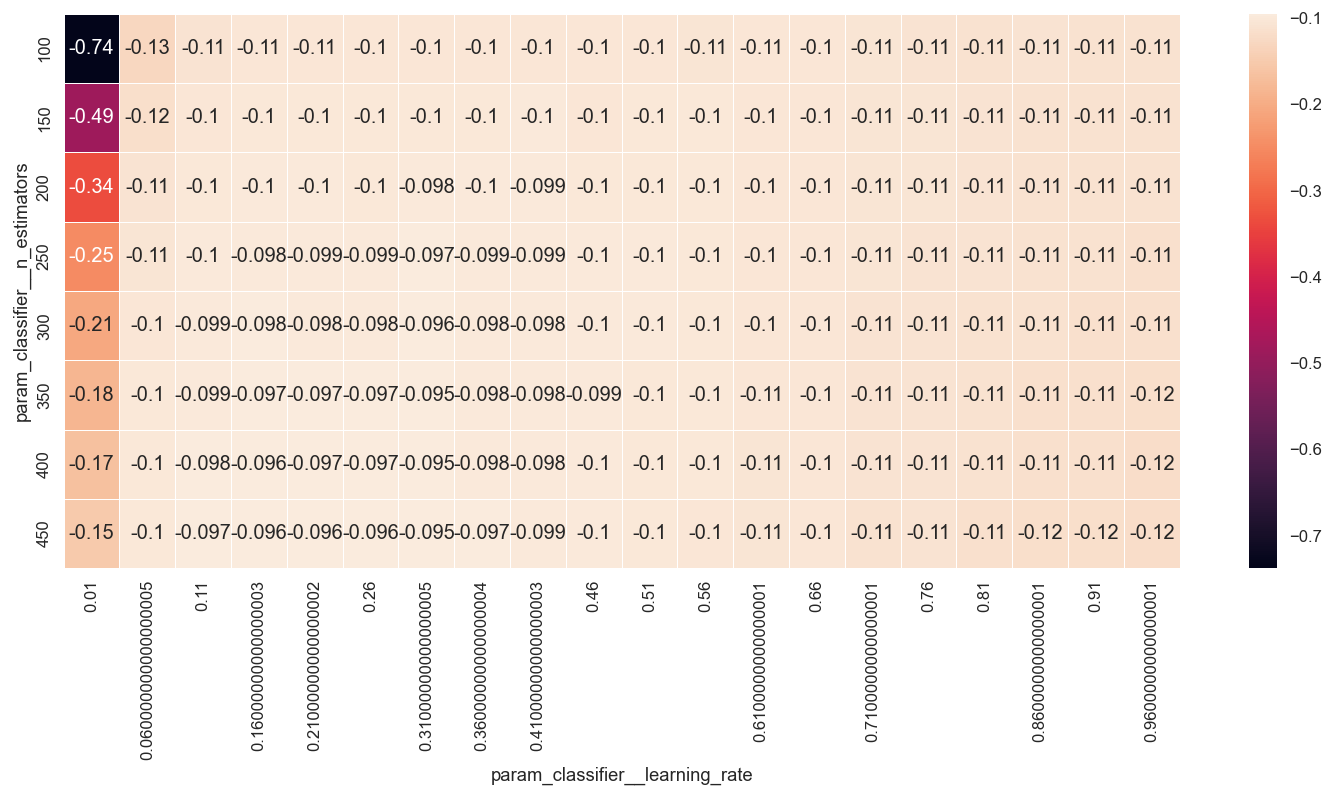

In [52]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__n_estimators',columns='param_classifier__learning_rate',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [53]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,54,53,55,31,39,52,30,47,46,38,...,159,8,7,6,5,4,3,2,1,0
mean_fit_time,3.33295,2.963267,3.744844,3.852496,4.085811,2.566978,3.45368,4.064715,3.351155,3.503805,...,3.160078,0.792979,4.084232,3.212225,2.670601,2.272311,2.26351,1.642569,1.175663,0.770973
std_fit_time,0.509868,0.497679,0.521376,0.595966,0.772169,0.506742,0.393662,0.686753,0.441144,0.439632,...,0.131156,0.020395,0.647863,0.413838,0.051536,0.032066,0.258462,0.17214,0.071952,0.017853
mean_score_time,0.013603,0.014403,0.020204,0.019619,0.018004,0.013403,0.014262,0.018604,0.017204,0.014403,...,0.009802,0.010202,0.019604,0.021707,0.014003,0.014404,0.015803,0.015003,0.012003,0.011203
std_score_time,0.00049,0.0012,0.008637,0.006155,0.005551,0.001744,0.000818,0.006185,0.00891,0.00196,...,0.0004,0.00147,0.005644,0.015912,0.001265,0.001201,0.00542,0.005867,0.001789,0.00204
param_classifier,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...,GradientBoostingRegressor(learning_rate=0.3100...
param_classifier__learning_rate,0.31,0.31,0.31,0.16,0.21,0.31,0.16,0.26,0.26,0.21,...,0.96,0.06,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
param_classifier__n_estimators,400,350,450,450,450,300,400,450,400,400,...,450,100,450,400,350,300,250,200,150,100
param_preprocessing,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...",...,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ..."
params,{'classifier': GradientBoostingRegressor(learn...,{'classifier': GradientBoostingRegressor(learn...,{'classifier': GradientBoostingRegressor(learn...,{'classifier': GradientBoostingRegressor(learn...,{'classifier': GradientBoostingRegressor(learn...,{'classifier': GradientBoostingRegressor(learn...,{'classifier': GradientBoostingRegressor(learn...,{'classifier': GradientBoostingRegressor(learn...,{'classifier': GradientBoostingRegressor(learn...,{'classifier': GradientBoostingRegressor(learn...,...,{'classifier': GradientBoostingRegressor(learn...,{'classifier': GradientBoostingRegressor(learn...,{'classifier': GradientBoostingRegressor(learn...,{'classifier': GradientBoostingRegressor(learn...,{'classifier': GradientBoostingRegressor(learn...,{'classifier': GradientBoostingRegressor(learn...,{'classifier': GradientBoostingRegre

## Lasso, Ridge, ElasticNet + LinearRegression

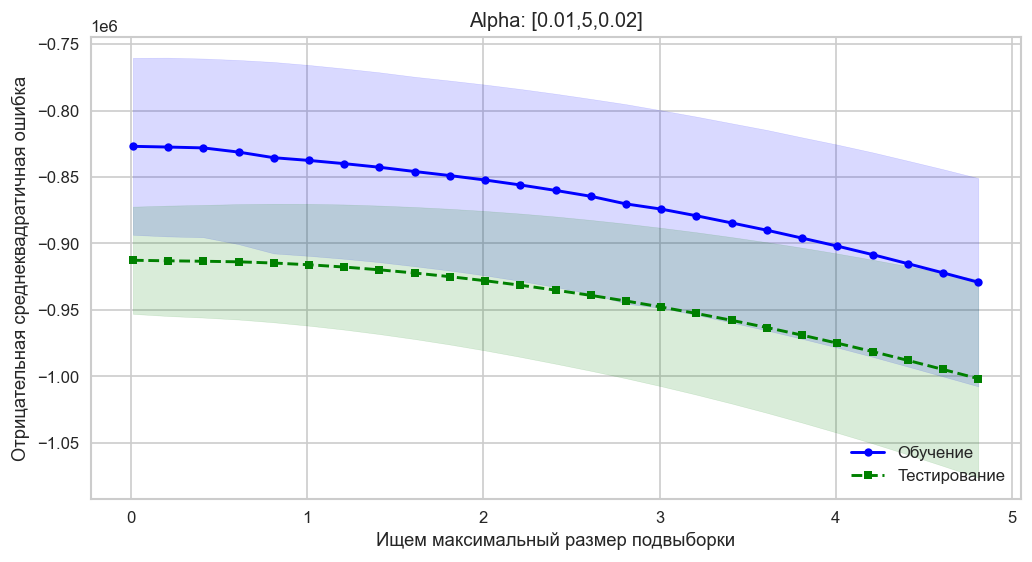

In [55]:
# Подбираем степень регулиризации alpha
alpha = np.arange(0.01,5,0.2)
scores_train = []
scores_test = []
for i in alpha:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', Lasso(alpha = i))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Alpha: [0.01,5,0.02]')
plt.plot(alpha, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(alpha, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(alpha, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(alpha, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем степень регулиризации')
plt.ylabel('Отрицательная среднеквадратичная ошибка')
plt.legend(loc='lower right')
plt.show()

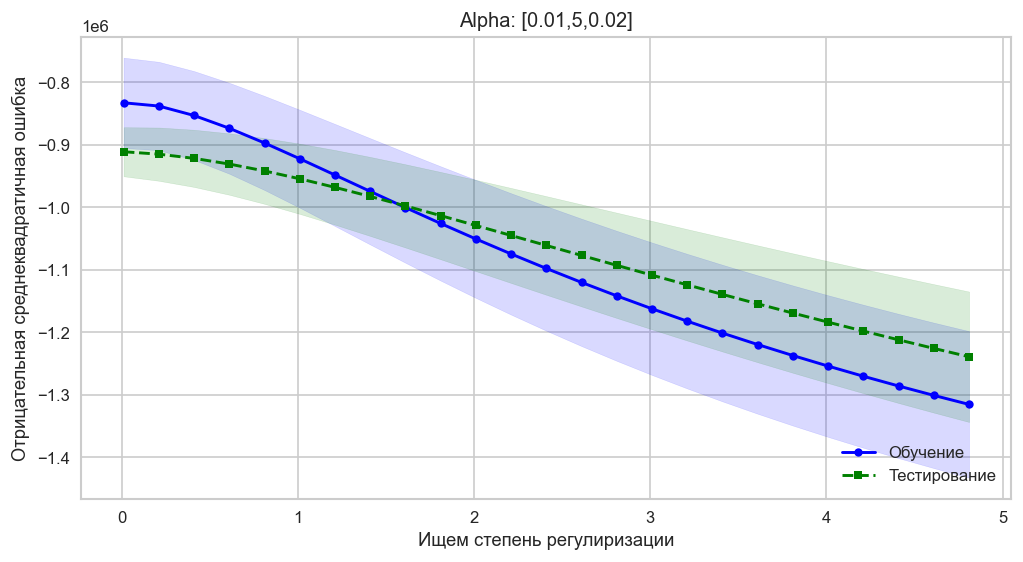

In [56]:
# Подбираем кол-во максимальной выборки max_samples
alpha = np.arange(0.01,5,0.2)
scores_train = []
scores_test = []
for i in alpha:
    ridge = Pipeline([ ('preprocessing', CT) , ('regression', Ridge(alpha = i))])
    scores_train.append(cross_val_score(ridge, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(ridge, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Alpha: [0.01,5,0.02]')
plt.plot(alpha, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(alpha, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(alpha, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(alpha, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем степень регулиризации')
plt.ylabel('Отрицательная среднеквадратичная ошибка')
plt.legend(loc='lower right')
plt.show()

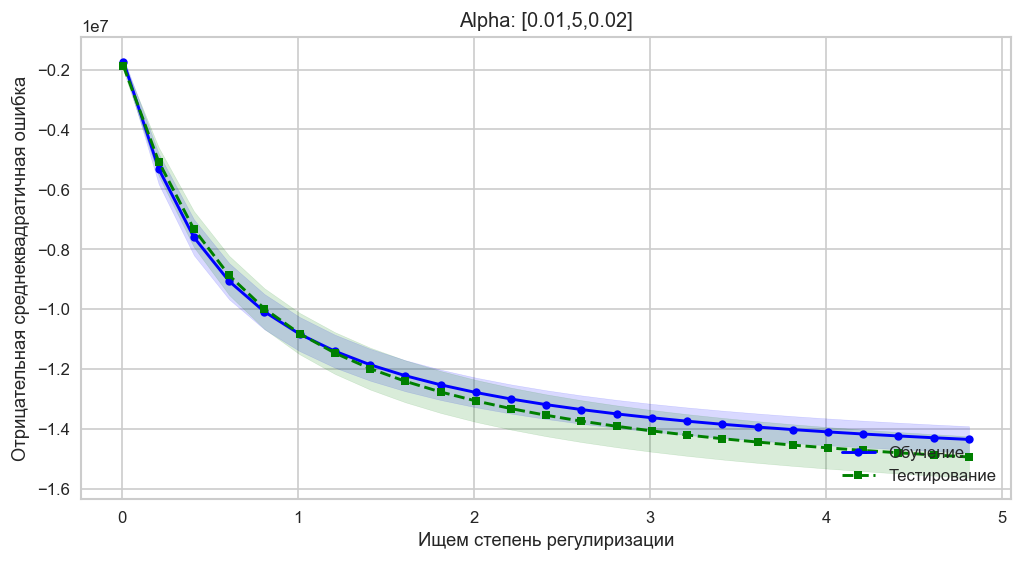

In [57]:
# Подбираем кол-во максимальной выборки max_samples
alpha = np.arange(0.01,5,0.2)
scores_train = []
scores_test = []
for i in alpha:
    elasticnet = Pipeline([ ('preprocessing', CT) , ('regression', ElasticNet(alpha = i))])
    scores_train.append(cross_val_score(elasticnet, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(elasticnet, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Alpha: [0.01,5,0.02]')
plt.plot(alpha, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(alpha, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(alpha, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(alpha, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем степень регулиризации')
plt.ylabel('Отрицательная среднеквадратичная ошибка')
plt.legend(loc='lower right')
plt.show()

In [58]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', Lasso())])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 815270.791317468
Test: 930416.1404338211
Train: 0.3064074828732632
Test: 0.3269390518406745


In [59]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', Lars())])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 4641979135.431687
Test: 4752260945.2448
Train: 29.493093868074045
Test: 29.097556656518968


In [60]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', ElasticNet())])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 11135423.474634942
Test: 11791819.463439932
Train: 1.4327426900197835
Test: 1.4177332028676177


In [61]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', LinearRegression())])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 810009.2870264064
Test: 920034.4510263122
Train: 0.3063742165781309
Test: 0.3267873242380834


## Еще одна бесполезная модель SVR

In [62]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

pipe = Pipeline([('preprocessing', CT), 
                 ('classifier', SVR(kernel = 'rbf'))])

C=np.array([0.5,1,2,3,5,10])
gamma=[0.01,0.05,0.1]


param_grid =[
    {'preprocessing': [CT], 
     'classifier': [SVR()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]
# cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe, param_grid, cv=KFold(5), return_train_score=True, scoring= 'neg_mean_absolute_percentage_error', n_jobs = -1)
grid.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['x',
                                                                          'y',
                                                                          'z',
                                                                          'carat',
                                                                          'depth',
                                                                          'table']),
                                                                        ('imputer_for_categorical_OHE',
                                                                         Pipeline(steps=[('imputer'...
                                                              transformers=[('imputer_for_nums',
                                                                             Pipeline(steps=[('imputer',
                                                                                              KNNImputer()),
                                                                                             ('scaler',
                                                                                              MinMaxScaler())]),
                                                                             ['x',
                                                                              'y',
                                                                              'z',
                                                                              'carat',
                                                                              'depth',
                                                                              'table']),
                                                                            ('imputer_for_categorical_OHE',
                                                                             Pipeline(steps=[('imputer',
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('scaler',
                                                                                              OneHotEncoder())]),
                                                                             ['cut',
                                                                              'color',
                                                                              'clarity'])])]}],
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

<AxesSubplot: xlabel='param_classifier__gamma', ylabel='param_classifier__C'>

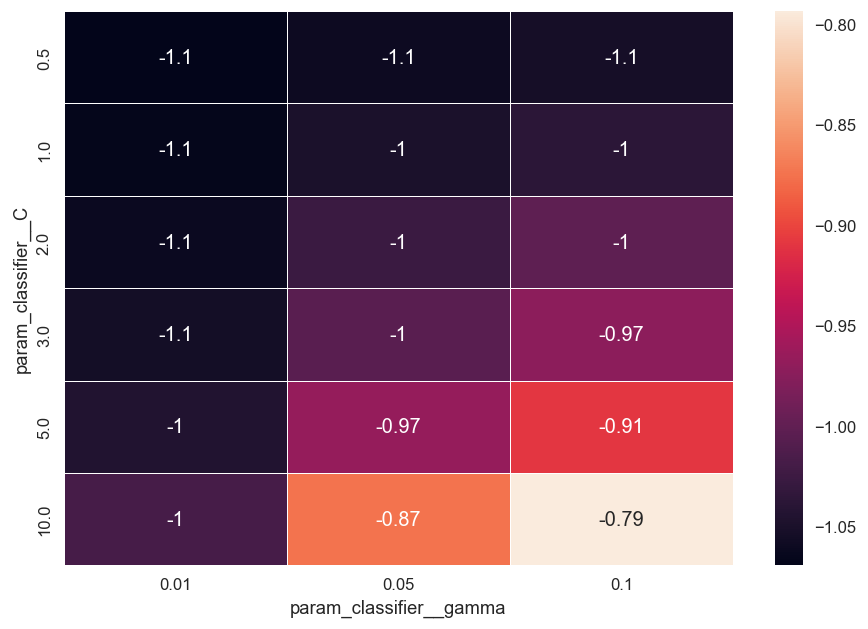

In [63]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [64]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,17,16,14,13,11,8,10,15,7,5,12,4,2,9,1,6,3,0
mean_fit_time,1.097198,1.112581,1.170462,1.131855,1.220674,1.180665,1.191269,1.176664,1.24528,1.223677,1.220074,1.197734,1.038693,1.310896,1.041367,1.224069,1.175539,1.015092
std_fit_time,0.02266,0.008936,0.11247,0.028337,0.142157,0.026977,0.090863,0.065902,0.137595,0.065869,0.117589,0.064065,0.042114,0.178507,0.032042,0.127341,0.056422,0.033281
mean_score_time,0.433327,0.485977,0.510915,0.505514,0.530119,0.522918,0.528318,0.535121,0.525317,0.520252,0.543322,0.520387,0.526518,0.546122,0.527318,0.526517,0.524987,0.523517
std_score_time,0.053215,0.010879,0.004401,0.008548,0.026198,0.005116,0.03605,0.019073,0.020784,0.005867,0.038048,0.008313,0.015911,0.036881,0.011001,0.022832,0.016433,0.015322
param_classifier,"SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)","SVR(C=10.0, gamma=0.1)"
param_classifier__C,10.0,10.0,5.0,5.0,3.0,2.0,3.0,10.0,2.0,1.0,5.0,1.0,0.5,3.0,0.5,2.0,1.0,0.5
param_classifier__gamma,0.1,0.05,0.1,0.05,0.1,0.1,0.05,0.01,0.05,0.1,0.01,0.05,0.1,0.01,0.05,0.01,0.01,0.01
param_preprocessing,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ..."
params,"{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi...","{'classifier': SVR(C=10.0, gamma=0.1), 'classi..."
split0_test_score,-0.789203,-0.857381,-0.887491,-0.934937,-0.938624,-0.964706,-0.969112,-0.981171,-0.989797,-0.998309,-1.007706,-1.011705,-1.014994,-1.01559,-1.020261,-1.020668,-1.026632,-1.029192


## ExtraTreesRegressor еще один ансамблевый метод, но мы его не изучали, но он есть в sklearn. Может покажет хороший результат

In [65]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', ExtraTreesRegressor())])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 0.0
Test: 482556.1481317124
Train: 0.0
Test: 0.09422948220716368


## Данный код нужен будет, если задача будет сводится к понижению размерности датафрейма (отбору фич путем поиска важных фич)

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Стандартизация данных
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

pca = PCA()
# Вычисление PCA

pipe = Pipeline([('preprocessing', CT),
                     ('regression', PCA())])
pipe.fit(X_train)

# Вывод объясненной дисперсии для каждой компоненты
explained_variance_ratio = pipe['regression'].explained_variance_ratio_
print(explained_variance_ratio)

# Выбор столбцов с наибольшим вкладом
n_components = 2 # количество выбранных компонент
most_informative_columns = pipe['regression'].components_[:n_components, :]

[1.60890887e-01 1.11077433e-01 9.38043476e-02 9.04939693e-02
 8.28304445e-02 7.45125202e-02 7.04963132e-02 6.63876711e-02
 5.53238332e-02 4.70915681e-02 3.69148912e-02 2.91352771e-02
 2.66473233e-02 2.03004391e-02 1.35574630e-02 9.05478848e-03
 4.73572678e-03 3.80592339e-03 1.97975115e-03 6.45533000e-04
 2.77784484e-04 2.50392431e-05 1.10728796e-05 8.49729024e-33
 5.31602813e-33 5.27299983e-33]


In [72]:
# pipe = Pipeline([('preprocessing', CT),
#                      ('regression', GradientBoostingRegressor(learning_rate=0.1, n_estimators=100))])


# rfe_select = RFE(pipe, step = 1, 
#                  n_features_to_select=19)
# rfe_select.fit(X_train, y_train)


rfe_select = RFE(RandomForestRegressor(n_estimators=5, n_jobs=-1), step = 1, 
                 n_features_to_select=19)
rfe_select.fit(X_train_new, y_train_new)



RFE(estimator=RandomForestRegressor(n_estimators=5, n_jobs=-1),
    n_features_to_select=19)

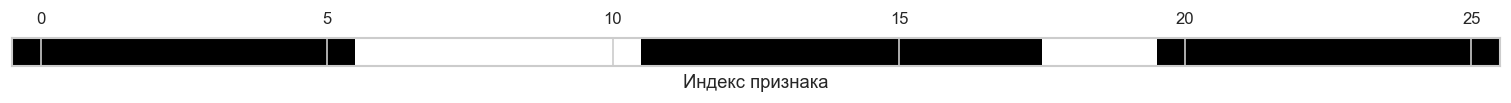

In [73]:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

In [74]:
X_train_new

,imputer_for_nums__x,imputer_for_nums__y,imputer_for_nums__z,imputer_for_nums__carat,imputer_for_nums__depth,imputer_for_nums__table,imputer_for_categorical_OHE__cut_Fair,imputer_for_categorical_OHE__cut_Good,imputer_for_categorical_OHE__cut_Ideal,imputer_for_categorical_OHE__cut_Premium,...,imputer_for_categorical_OHE__color_I,imputer_for_categorical_OHE__color_J,imputer_for_categorical_OHE__clarity_I1,imputer_for_categorical_OHE__clarity_IF,imputer_for_categorical_OHE__clarity_SI1,imputer_for_categorical_OHE__clarity_SI2,imputer_for_categorical_OHE__clarity_VS1,imputer_for_categorical_OHE__clarity_VS2,imputer_for_categorical_OHE__clarity_VVS1,imputer_for_categorical_OHE__clarity_VVS2
0,0.334520,0.344262,0.189369,0.167260,0.417391,0.200000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.281139,0.289617,0.134551,0.124555,0.156522,0.266667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.085409,0.083789,0.049834,0.024911,0.478261,0.266667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.418149,0.429872,0.240864,0.238434,0.426087,0.400000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.330961,0.338798,0.194352,0.170819,0.478261,0.200000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4350,0.177936,0.169399,0.102990,0.071174,0.469565,0.400000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4351,0.362989,0.353370,0.207641,0.185053,0.486957,0.266667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4352,0.110320,0.114754,0.059801,0.035587,0.391304,0.333333,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4353,0.398577,0.408015,0.245847,0.238434,0.573913,0.333333,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [75]:
X_train_new_imp = X_train_new[X_train_new.columns[mask]]
X_test_new_imp = X_test_new[X_test_new.columns[mask]]
features_names_imp = X_train_new.columns[mask]

In [76]:
features_names_imp

Index(['imputer_for_nums__x', 'imputer_for_nums__y', 'imputer_for_nums__z',
       'imputer_for_nums__carat', 'imputer_for_nums__depth',
       'imputer_for_nums__table', 'imputer_for_categorical_OHE__color_D',
       'imputer_for_categorical_OHE__color_E',
       'imputer_for_categorical_OHE__color_F',
       'imputer_for_categorical_OHE__color_G',
       'imputer_for_categorical_OHE__color_H',
       'imputer_for_categorical_OHE__color_I',
       'imputer_for_categorical_OHE__color_J',
       'imputer_for_categorical_OHE__clarity_SI1',
       'imputer_for_categorical_OHE__clarity_SI2',
       'imputer_for_categorical_OHE__clarity_VS1',
       'imputer_for_categorical_OHE__clarity_VS2',
       'imputer_for_categorical_OHE__clarity_VVS1',
       'imputer_for_categorical_OHE__clarity_VVS2'],
      dtype='object')

In [77]:
rf = RandomForestRegressor(bootstrap = True, ccp_alpha = 0.5, criterion='poisson', max_features = None, n_estimators = 200)
rf.fit(X_train_new[list(features_names_imp)], y_train)

RandomForestRegressor(ccp_alpha=0.5, criterion='poisson', max_features=None,
                      n_estimators=200)

In [78]:
y_pred_1 = rf.predict(X_test_new_imp)

print("Train:",mean_squared_error(y_train, rf.predict(X_train_new_imp)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, rf.predict(X_train_new_imp)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 441149.31742514065
Test: 643136.4201124699
Train: 0.1300343062360249
Test: 0.14247263573654403


### Типо на этом моменте мы отобрали 19 фич важных, и мы видоизменили наш X_train_new_imp и X_test_new_imp. После этого можно только запускать модельку без ColumnTransformers

### Данное задание было в качестве контрольной у ЭМИТа прошлого года. То есть все что нужно сделать это отобрать из 200-300 фич 20-30 основных фич и сделать модель, также подобрав параметры

#### Теперь еще можно глянуть на лучшую выбранную модель и проверить через PredictionErrorDisplay насколько кросс-валидированные оценки схожи с линией регрессии

In [79]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', RandomForestRegressor(n_jobs = -1, criterion = 'friedman_mse', n_estimators = 300, max_depth = 12, 
                                                   max_features = 0.8, min_samples_leaf = 1))])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)
print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 0.06307884560397625
Test: 0.10009845154821555
Train: 0.06307884560397624
Test: 0.10009845154821555


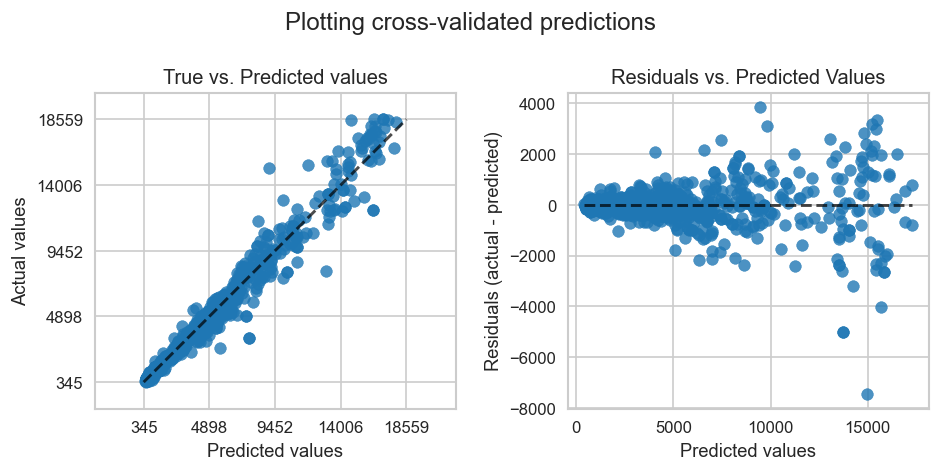

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred_1,
    kind="actual_vs_predicted",
    ax=axs[0],
)
axs[0].set_title("True vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred_1,
    kind="residual_vs_predicted",
    ax=axs[1],
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show();

## Проверяем пропуски на тестовых данных

In [81]:
path_test = 'test.csv'

df_test = pd.read_csv(path_test)

In [82]:
df_test

,carat,cut,color,clarity,depth,table,x,y,z
0,0.50,Ideal,D,SI1,62.1,57.0,5.05,5.08,3.14
1,2.00,Very Good,G,SI2,59.5,57.0,8.08,8.15,4.89
2,0.27,Premium,E,VVS1,60.5,59.0,4.19,4.16,2.52
3,0.32,Premium,I,VVS1,61.2,59.0,4.43,4.44,2.71
4,1.19,Ideal,H,SI1,62.5,56.0,6.77,6.81,4.23
...,...,...,...,...,...,...,...,...,...
48389,0.43,Very Good,D,VS2,63.2,57.0,4.84,4.81,3.04
48390,2.02,Premium,J,SI2,62.4,60.0,8.03,8.10,5.03
48391,0.39,Very Good,G,SI1,63.5,56.0,4.58,4.64,2.95
48392,0.53,Ideal,G,VVS1,61.2,56.0,5.25,5.22,3.20


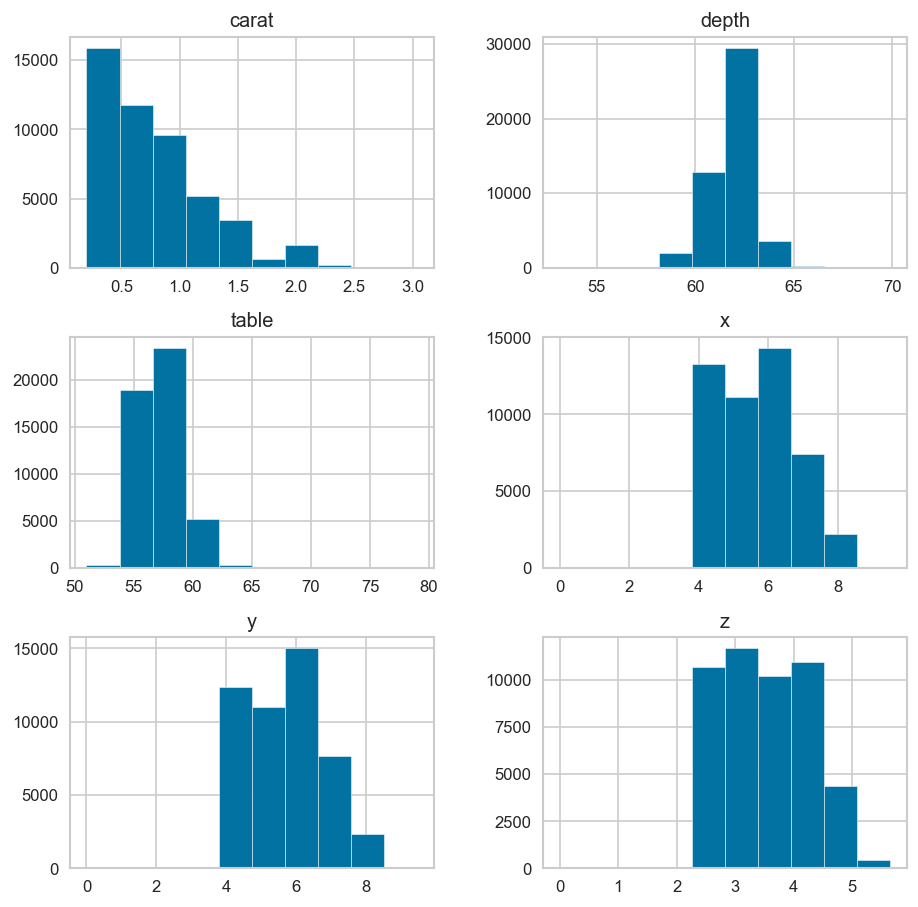

In [83]:
df_test.hist(figsize=(9, 9));

In [84]:
df_test

,carat,cut,color,clarity,depth,table,x,y,z
0,0.50,Ideal,D,SI1,62.1,57.0,5.05,5.08,3.14
1,2.00,Very Good,G,SI2,59.5,57.0,8.08,8.15,4.89
2,0.27,Premium,E,VVS1,60.5,59.0,4.19,4.16,2.52
3,0.32,Premium,I,VVS1,61.2,59.0,4.43,4.44,2.71
4,1.19,Ideal,H,SI1,62.5,56.0,6.77,6.81,4.23
...,...,...,...,...,...,...,...,...,...
48389,0.43,Very Good,D,VS2,63.2,57.0,4.84,4.81,3.04
48390,2.02,Premium,J,SI2,62.4,60.0,8.03,8.10,5.03
48391,0.39,Very Good,G,SI1,63.5,56.0,4.58,4.64,2.95
48392,0.53,Ideal,G,VVS1,61.2,56.0,5.25,5.22,3.20


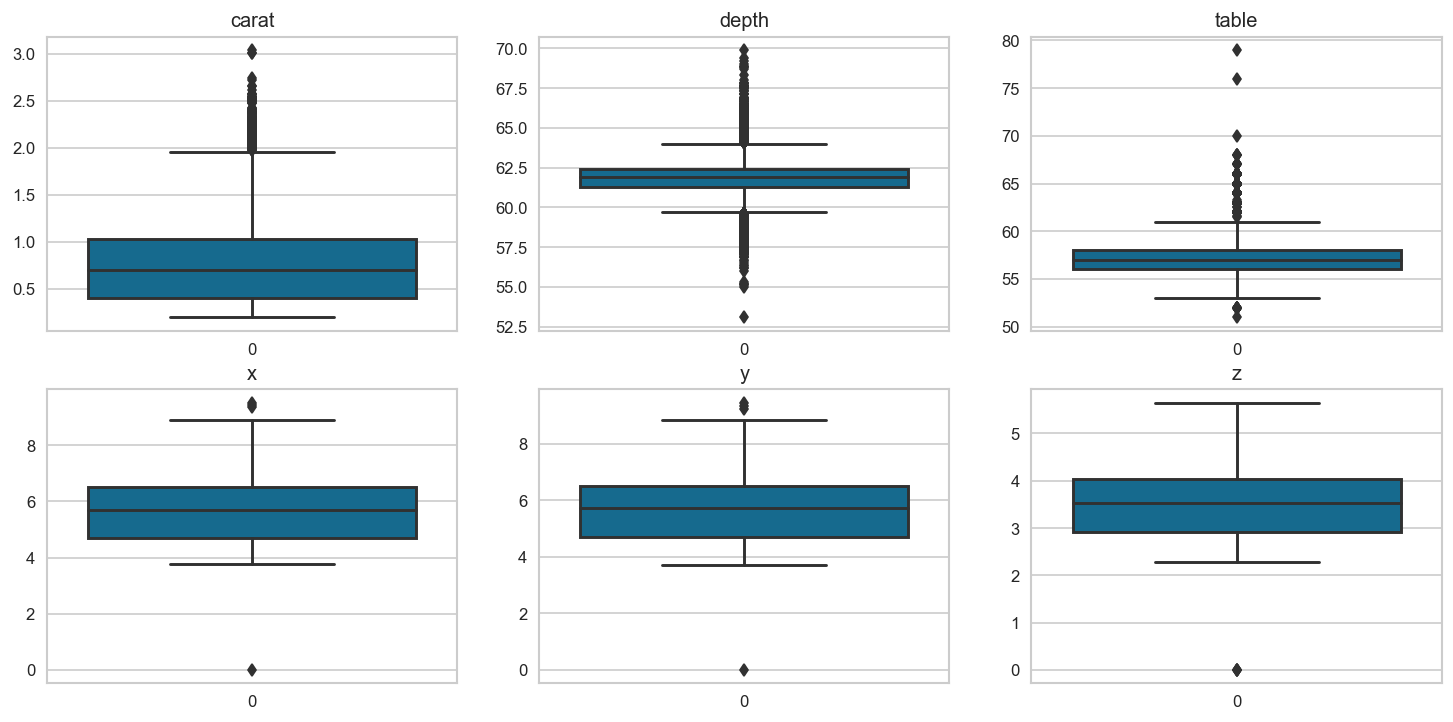

In [85]:
import math
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(df_test.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,7))
for i, col in enumerate(df_test.select_dtypes(include=[np.number]).columns):
    sns.boxplot(data=df_test[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

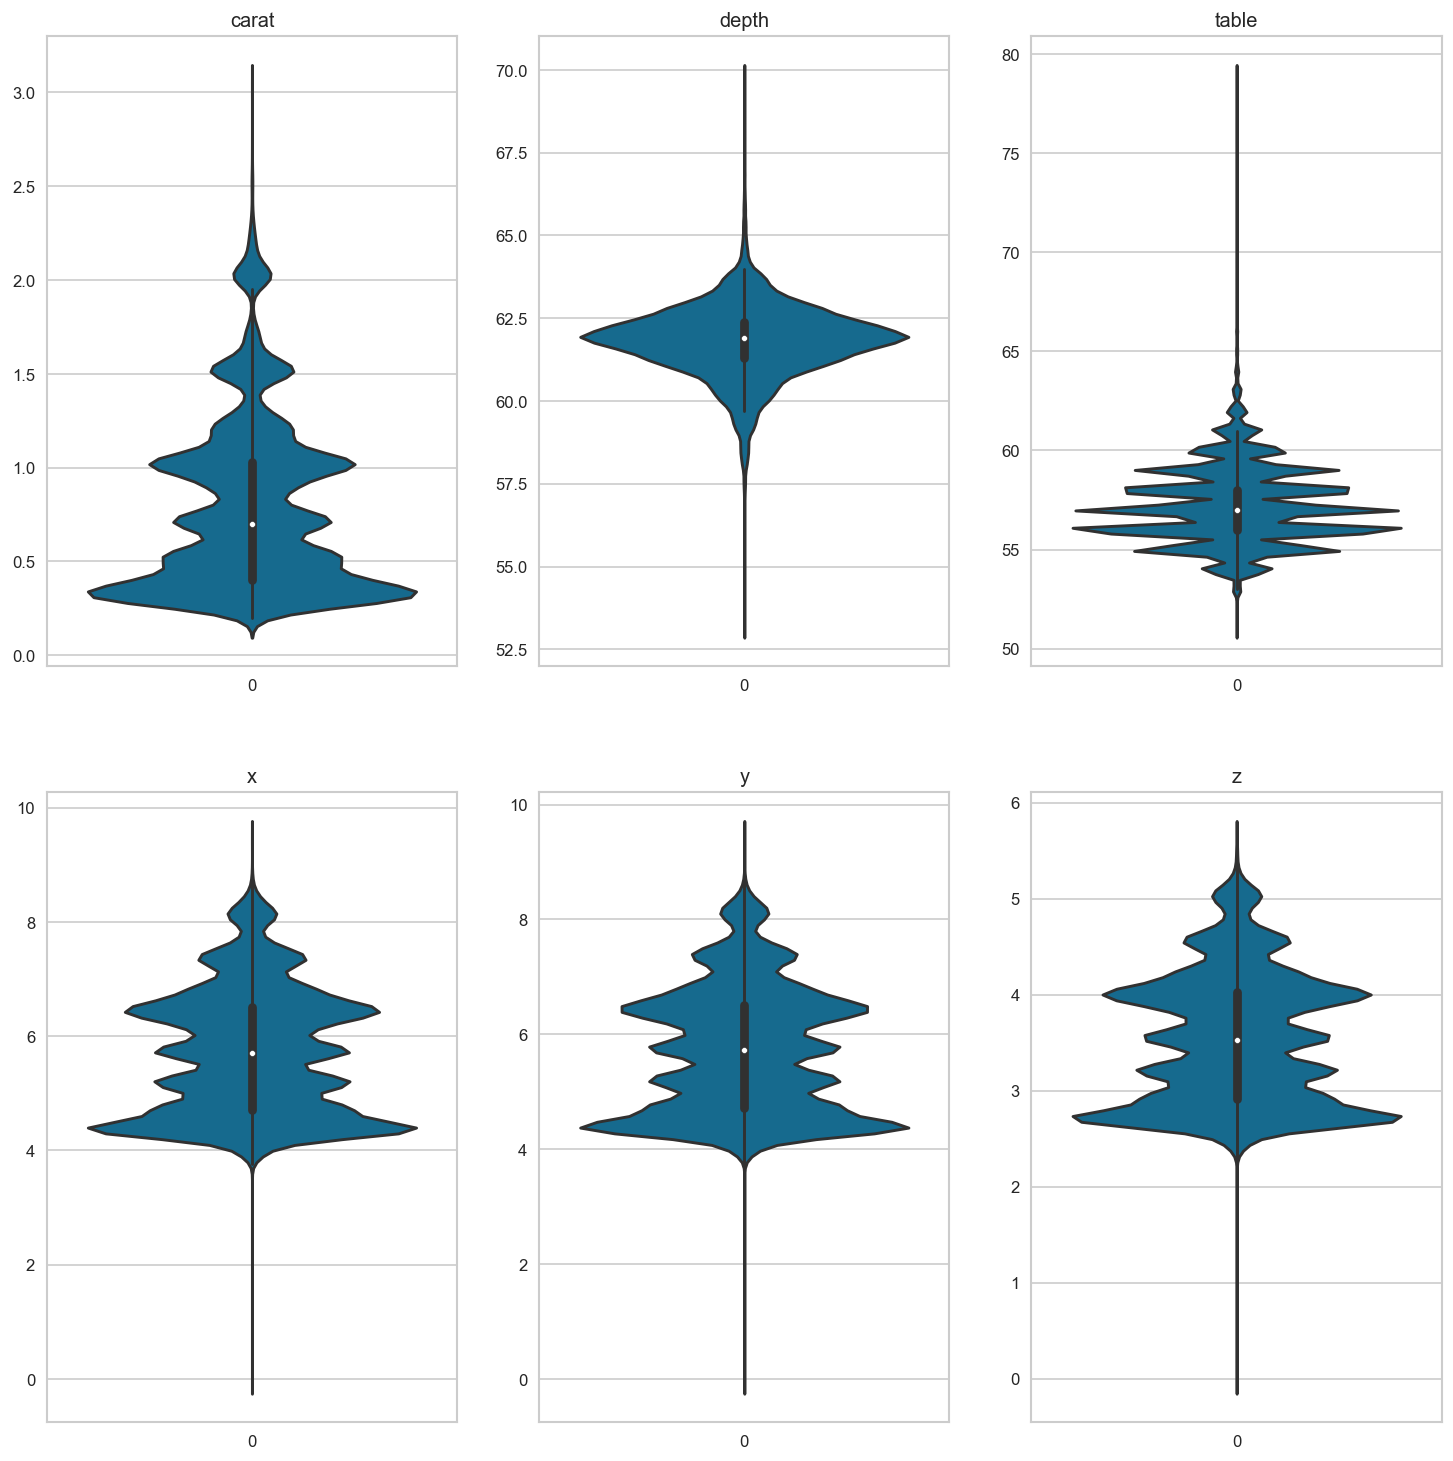

In [86]:
import math
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(df_test.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,15))
for i, col in enumerate(df_test.select_dtypes(include=[np.number]).columns):
    sns.violinplot(data=df_test[col], ax=axes.flatten()[i]).set_title(col)
plt.show()